---

# AMOC-GIS Tipping Cascade Calibration Module (AGTCCM) - Parameterization B 
---
**Author** : Amaury Laridon

**Date** : 07/11/23

---


Here, we will numerically translate Algorithm I, which corresponds to the method described in my thesis and which is a generalized application of Monteiro's (2022) method. We look at the choice of parameterization "B" which corresponds to two distincts forcing for the fresh water flux on the AMOC. $F_{GIS}$ associated to the specific Greeland Ice Sheet's fresh water flux and $F_{O}$ corresponding to all the others contributions.

---
## Reminder of the mathematical framework


#### AMOC's calibration

We wish to calibrate the following ODE,
$$      \frac{d\Psi}{dt} = (-\Psi^3 + a_1\Psi^2 + b_1\Psi + c_1 + d_1 T + e_{12}F_{GIS}+fF_O)\mu_\Psi(\Psi)  = h(\Psi, T, F_{GIS}, F_O) \quad (1)      $$
The mathematical framework described in my thesis has given us the following results for coefficient values,

$$a_1 = \frac{3(\Psi^{-}+\Psi^{+})}{2} \quad (a) $$
$$b_1 =  -3 \Psi^{-}\Psi^+ \quad (b)$$
$$   c_1 + e_{12}F_{GIS}^A + fF_O^A  = \frac{T^+_\Psi\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-T^{-}_\Psi\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(T^{-}_\Psi-T^{+}_\Psi)} \quad (c) $$
$$  d_1 = -\frac{(\Psi^{+}-\Psi^{-})^3}{2(T^{+}_\Psi-T^{-}_\Psi)} \quad (d)   $$
$$     c_1+d_1T^B+fF_O^B =  \frac{F^+_{GIS}\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-F^{-}_{GIS}\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(F^{-}_{GIS}-F^{+}_{GIS})}\quad (e)  $$
$$  e_{12} =-\frac{(\Psi^{+}-\Psi^{-})^3}{2(F_{GIS}^{+}-F_{GIS}^{-})} \quad (f) $$
$$    c_1 + d_1T^C + e_{12}F_{GIS}^C = \frac{F^+_O\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-F^{-}_O\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(F^{-}_O-F^{+}_O)}  \quad (g)$$
$$  f = -\frac{(\Psi^{+}-\Psi^{-})^3}{2(F^{+}_O-F^{-}_O)} =f (\Psi^+,F^+_O, \Psi^-,F^-_O) \quad (h) $$

By ease of writing we can rewrite equations $(c),(e),(g)$,

$$c_1 = \frac{T^+_\Psi\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-T^{-}_\Psi\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(T^{-}_\Psi-T^{+}_\Psi)}  - e_{12}F_{GIS}^A - fF_O^A \quad (i)  $$
$$c_1 = \frac{F^+_{GIS}\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-F^{-}_{GIS}\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(F^{-}_{GIS}-F^{+}_{GIS})} -d_1T^B-fF_O^B \quad (j)$$
$$ c_1 =  \frac{F^+_O\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-F^{-}_O\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(F^{-}_O-F^{+}_O)}   -d_1T^C - e_{12}F_{GIS}^C \quad (k) $$


For the **experience noted A** which represents the sensibility experiment with regard to temperature anomaly and a fixed fresh water flux for the GIS and Other components we have,

$$     \frac{d\Psi}{dt} = (-\Psi^3 + a_1\Psi^2 + b_1\Psi + c_1 + d_1 T + e_{12}F_{GIS}^A+fF_O^A)\mu_\Psi(\Psi)  = h(\Psi, T, F_{GIS}^A, F_O^A) \quad (2)      $$

For the **experience noted B** which represents the sensibility experiment with regard to GIS's fresh water flux and a fixed temperature anomaly and a fixed $F_O$ we have,

$$     \frac{d\Psi}{dt} = (-\Psi^3 + a_1\Psi^2 + b_1\Psi + c_1 + d_1 T^B + e_{12}F_{GIS}+fF_O^B)\mu_\Psi(\Psi)  = h(\Psi, T^B, F_{GIS}, F_O^B) \quad (3)  $$ 

For the **experience noted C** represents the sensibility experiment with regard to Other component's fresh water flux and a fixed temperature anomaly and a fixed $F_GIS$ we have,

$$        \frac{d\Psi}{dt} = (-\Psi^3 + a_1\Psi^2 + b_1\Psi + c_1 + d_1 T^C + e_{12}F_{GIS}^C+fF_O)\mu_\Psi(\Psi)  = h(\Psi, T^C, F_{GIS}^C, F_O) \quad (4)  $$ 

### GIS's calibration 

We wish to calibrate the following ODE,

$$  \frac{dV}{dt} = (-V^3 + a_2V^2 + b_2V + c_2 + d_2  T_V + e_{21} (1-\Psi_V))\mu_V(V, T_V, \Psi_V) = g(V, T_V, \Psi_V) \quad (4)  $$

and the mathematical framework described in my thesis gives the following values,

$$  a_2 = \frac{3(V^{-}+V^{+})}{2} \quad (i) $$
$$  b_2 = -3 V^{-}V^+ \quad (j) $$
$$ c_2 + e_{21}(1-\Psi^C) =  \frac{T^+_VV^{-^{2}}(V^{-}-3V^+)-T^{-}_VV^{+^{2}}(V^{+}-3V^{-})}{2(T^{-}_V-T^{+}_V)} \quad (k) $$
$$ d_2 = -\frac{(V^{+}-V^{-})^3}{2(T^{+}_V-T^{-}_V)} \quad (l) $$ 
$$ c_2 + d_2T^D =  V^+{^3} - a_2V^+{^2} -b_2V^+-e_{21}(1-\Psi_V^+) \quad (m) $$
$$ e_{21} = -\frac{(V^{+}-V^{-})^3}{2(\Psi^{-}_V-\Psi^{+}_V)} \quad (n) $$

By ease of writing we can rewrite equations $(k),(m)$,

$$ c_2 = \frac{T^+_VV^{-^{2}}(V^{-}-3V^+)-T^{-}_VV^{+^{2}}(V^{+}-3V^{-})}{2(T^{-}_V-T^{+}_V)} - e_{21}(1-\Psi^C) \quad (o) $$
$$ c_2 = ( V^+{^3} - a_2V^+{^2} -b_2V^+-e_{21}(1-\Psi_V^+))-d_2T_V^D \quad (p) $$ 

For the sensibility experiment C with regards to the temperature anomaly and a fixed AMOC's intensity we have,

$$ \frac{dV}{dt} = (-V^3 + a_2V^2 + b_2V + c_2 + e_{21}(1-\Psi^C) + d_2  T)\mu_V(V, T, \Psi) = g_{ExpC}(V, T_V, \Psi_V) \quad (5) $$

For the sensibility experiment D with regards to the AMOC's intensity and a fixed temperature anomaly we have,

$$  \frac{dV}{dt} = (-V^3 + a_2V^2 + b_2V + c_2 + d_2 T^D + e_{21} (1-\Psi))\mu_V(V, T, \Psi) = g_{ExpD}(V, T_V, \Psi_V) \quad (6)  $$ 

---

## Numerical implementation of the Calibration Module
---

First, we want to make a numerical implementation of this mathematical framework and test it by giving as input any critical values of the bifurcation coordinates. In other words, we're first going to see whether, given the data we want to reproduce, the algorithm is a good fit before, in a second phase, providing the algorithm with real experimental values as input.


##### Libraries import 

In [331]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import matplotlib.gridspec as gridspec

#%matplotlib nbagg
save_fig_dir = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures"

##### Calibration module 

The critical values of the system variable under study (AMOC or GIS) are generally denoted by $xp, xm$, corresponding to the upper and lower critical values respectively. The critical values of the forcings are noted $op, om$. 

To avoid confusion, I explicitly define a function by coefficients, although the form is the same for many coefficients and I can simply change the arguments of the common function when calling the function and assigning it to the coefficient.

In [332]:
### Definition of the functions computing the coefficient's values. 

## General functions shared by both systems (AMOC and GIS) ## 
def a(xp,xm):
    """Definition of the a_1 coefficient cfr. Eq.(a)"""
    return (3/2)*(xp+xm)
def b(xp,xm):
    """Definition of the b_1 coefficient cfr. Eq.(b)"""
    return -3*xp*xm
def d(xp,xm,op,om):
    """Definition of the d_1 coefficient cfr. Eq.(d)"""
    return -(xp-xm)**3/(2*(op-om))
def xm_today(op,om,xp) :
    """Definition of the constrain that the state of the system is equal to 1, its maximal value when the forcing is equal to zero at pre-industrial times"""
    G = (op+om+2*(op*om)**0.5)/(op-om)
    return (-2+xp*(1+G**(1/3)+G**(-1/3)))/(-1+G**(1/3)+G**(-1/3))

## Functions specific to the AMOC's system ## 

def e12(xp,xm,op,om):
    """Definition of the e_12 coefficient cfr. Eq.(f)"""
    return -(xp-xm)**3/(2*(op-om))
def f(xp,xm,op,om):
    """Definition of the f coefficient cfr. Eq.(h)"""
    return -(xp-xm)**3/(2*(op-om))

def cAMOC_A(xp,xm,op,om):
    """Definition of the c_1^A coefficient cfr. Eq.(c)"""
    return (op*xm**2*(xm-3*xp)-om*xp**2*(xp-3*xm))/(2*(om-op))
def cAMOC_B(xp,xm,op,om):
    """Definition of the c_1^B coefficient cfr. Eq.(e)"""
    return (op*xm**2*(xm-3*xp)-om*xp**2*(xp-3*xm))/(2*(om-op))
def cAMOC_C(xp,xm,op,om):
    """Definition of the c_1^C coefficient cfr. Eq.(g)"""
    return (op*xm**2*(xm-3*xp)-om*xp**2*(xp-3*xm))/(2*(om-op))

def c1_from_A(xp,xm,op1,om1, e12, FGIS_A, f, FO_A):
    """Definition of the c_1 coefficient from experience A cfr. Eq.(i)"""
    c_A = (op1*xm**2*(xm-3*xp)-om1*xp**2*(xp-3*xm))/(2*(om1-op1))
    return (c_A-(e12*FGIS_A)-(f*FO_A))
def c1_from_B(xp,xm,op2,om2, d1, TAMOC_B, f, FO_B):
    """Definition of the c_1 coefficient from experience B cfr. Eq.(j)"""
    c_B = (op2*xm**2*(xm-3*xp)-om2*xp**2*(xp-3*xm))/(2*(om2-op2))
    return c_B-(d1*TAMOC_B)-(f*FO_B)
def c1_from_C(xp,xm,op3,om3, d1, TAMOC_C, e12, FGIS_C):
    """Definition of the c_1 coefficient from experience C cfr. Eq.(k)"""
    c_C = (op3*xm**2*(xm-3*xp)-om3*xp**2*(xp-3*xm))/(2*(om3-op3))
    return c_C-(d1*TAMOC_C)-(e12*FGIS_C)

## Functions specific to the GIS's system ## 

def e21(xp,xm,op,om):
    """Definition of the e_21 coefficient cfr. Eq.(n)"""
    return -(xp-xm)**3/(2*(om-op))
def c2_from_C(xp,xm,op1,om1,op2,om2,Psi_C):
    """Definition of the c_2 coefficient from experience C cfr. Eq.(o)"""
    c_C = (op1*xm**2*(xm-3*xp)-om1*xp**2*(xp-3*xm))/(2*(om1-op1))
    e_21 = e21(xp,xm,op2,om2)
    return (c_C - (e_21*(1-Psi_C)))
def c2_from_D(xp,xm,op2,om2,op1,om1,TGIS_D):
    """Definition of the c_2 coefficient from experience D cfr. Eq.(p)"""
    e_21 = e21(xp,xm,op2,om2)
    a_2 = a(xp,xm)
    b_2 = b(xp,xm)
    c_D = ((xp**3) - a_2*(xp**2) - b_2*xp - e_21*(1-op2))
    d_2 = d(xp,xm,op1,om1)
    return (c_D-(d_2*TGIS_D))

### Definition of the calibration module ###

## AMOC ## 
def calib_module_AMOC_ParamB(Psip,Psim, Tp, Tm, FGISp, FGISm, FOp, FOm, FGIS_A, FO_A, TAMOC_B, FO_B, TAMOC_C, FGIS_C):
    """Calibration module for the AMOC with the parametrisation B for the fresh water flux."""
    #Psim = xm_today(Tp, Tm, Psip)
    a_1 = a(Psip, Psim)
    b_1 = b(Psip,Psim)
    d_1 = d(Psip,Psim, Tp, Tm)
    e_12 = e12(Psip, Psim, FGISp, FGISm)
    f_1 = f(Psip, Psim, FOp, FOm)
    c1_f_A = c1_from_A(Psip, Psim, Tp, Tm, e_12, FGIS_A, f_1, FO_A)
    c1_f_B = c1_from_B(Psip, Psim, FGISp, FGISm, d_1, TAMOC_B, f_1, FO_B)
    c1_f_C = c1_from_C(Psip, Psim, FOp, FOm, d_1, TAMOC_C, e_12, FGIS_C)
    return [a_1, b_1, d_1, e_12, f_1, c1_f_A, c1_f_B, c1_f_C]

## GIS ## 
def calib_module_GIS(Vp, Vm, Tp, Tm, Psip, Psim, Psi_C, TGIS_D):
    """Calibration module for the GIS"""
    Vm = xm_today(Tp, Tm, Vp)
    a_2 = a(Vp, Vm)
    b_2 = b(Vp, Vm)
    d_2 = d(Vp, Vm, Tp, Tm)
    e_21 = e21(Vp, Vm, Psip, Psim)
    c2_f_C = c2_from_C(Vp, Vm, Tp, Tm, Psip, Psim, Psi_C)
    c2_f_D = c2_from_D(Vp, Vm, Psip, Psim, Tp, Tm, TGIS_D)
    return [a_2, b_2, d_2, e_21, c2_f_C, c2_f_D]



#### Test data and coefficients calibration based on it

In [333]:
##### Sensibility Experiment parameters #####

### AMOC ###
FGIS_A = 0.8 # Constant value of the fresh water flux from the GIS for the sensibility experiment A [Sv] 
FO_A = 0.3 # Constant value of the fresh water flux from the Other components for the sensibility experiment A [Sv]
TAMOC_B = 2 # Constant value of the temperature for the sensibility experiment B [°C]
FO_B = 0.8 # Constant value of the fresh water flux from the Other components for the sensibility experiment B [Sv]
TAMOC_C = 2 # Constant value of the temperature for the sensibility experiment C [°C]
FGIS_C = 0.5 # Constant value of the fresh water flux from the GIS for the sensibility experiment C [Sv] 
crit_time_scale_sep_AMOC = 0.3 # Intensity of the AMOC at which there is a seperation of the dynamic's time scale [Adim]

### GIS ###
Psi_C = 0.9 # Constant value of the AMOC's intensity for the sensibility experiment C [Adim]
TGIS_D = 1.5 # Constant value of the temperature for the sensibility experiment D [°C]

##### Critical Bifurcation Data #####

### Data from Victor Couplet (2023) ###

couplet_values = True 
couplet_normal_case = True 
couplet_worst_case = False

if couplet_values:
    if couplet_normal_case:
        ## Couplet SURFER v3.0 "normal case" values for AMOC ##  
        Psip_AMOC = 0.77 # Higher critical value of the AMOC intensity 
        Tp_AMOC = 4 # Higher critical temperature forcing value for the AMOC 
        Tm_AMOC = 0 # Lower critical temperature forcing value for the AMOC 
        FGISp_AMOC = 0.5 # Higher critical fresh water forcing value from the GIS for the AMOC (Non defined in Couplet (2023))
        FGISm_AMOC = 0.05 # Lower critical fresh water forcing value from the GIS for the AMOC (Non defined in Couplet (2023))
        FOp_AMOC = 0.8 # Higher critical fresh water forcing value from the other components for the AMOC (Non defined in Couplet (2023))
        FOm_AMOC = 0.08 # Lower critical fresh water forcing value from the other components for the AMOC (Non defined in Couplet (2023))
        Psim_AMOC = xm_today(Tp_AMOC,Tm_AMOC,Psip_AMOC) # Lower critical value of the AMOC intensity
        taup_AMOC = 50 # Timescale associated to the AMOC when it is on its ON state
        taum_AMOC = 50 # Timescale associated to the AMOC when it is on its OFF state
        ### Couplet SURFER v3.0 "normal case" values for GIS ###
        Vp_GIS = 0.77 # Higher critical value of the GIS volume
        Tp_GIS = 1.52 # Higher critical temperature forcing value for the GIS
        Tm_GIS = 0.3 # Lower critical temperature forcing value for the GIS
        Psip_GIS = 0.7 # Higher critical AMOC's intensity value for the GIS (Non defined in Couplet (2023))
        Psim_GIS = 0.1 # Lower critical AMOC's intensity value for the GIS (Non defined in Couplet (2023))
        Vm_GIS = xm_today(Tp_GIS, Tm_GIS, Vp_GIS) # Lower critical value of the GIS volume
        taup_GIS = 2000 # Timescale associated to the GIS when it is on its ON state
        taum_GIS = 2000 # Timescale associated to the GIS when it is on its OFF state
    if couplet_worst_case:
        ## Couplet SURFER v3.0 "worst case" values for AMOC ##  
        Psip_AMOC = 0.77 
        Tp_AMOC = 1.4 
        Tm_AMOC = 0 
        FGISp_AMOC = 0.5 # Higher critical fresh water forcing value from the GIS for the AMOC (Non defined in Couplet (2023))
        FGISm_AMOC = 0.05 # Lower critical fresh water forcing value from the GIS for the AMOC (Non defined in Couplet (2023))
        FOp_AMOC = 0.8 # Higher critical fresh water forcing value from the other components for the AMOC (Non defined in Couplet (2023))
        FOm_AMOC = 0.08 # Lower critical fresh water forcing value from the other components for the AMOC (Non defined in Couplet (2023))
        Psim_AMOC = xm_today(Tp_AMOC,Tm_AMOC,Psip_AMOC) 
        taup_AMOC = 15 
        taum_AMOC = 15
        ### Couplet SURFER v3.0 "worst case" values for GIS ###
        Vp_GIS = 0.77 
        Tp_GIS = 0.8
        Tm_GIS = 0.3
        Psip_GIS = 0.7 # Non defined in Couplet (2023)
        Psim_GIS = 0.1 # Non defined in Couplet (2023)
        Vm_GIS = xm_today(Tp_GIS, Tm_GIS, Vp_GIS) 
        taup_GIS = 1000 
        taum_GIS = 1000 

AMOC_crit_params = [Psip_AMOC, Psim_AMOC, Tp_AMOC, Tm_AMOC, FGISp_AMOC, FGISm_AMOC, FOp_AMOC, FOm_AMOC, taup_AMOC, taum_AMOC] # List containing all the AMOC's critical parameters
GIS_crit_params = [Vp_GIS, Vm_GIS, Tp_GIS, Tm_GIS, Psip_GIS, Psim_GIS, taup_GIS, taum_GIS] # List containing all the GIS's critical parameters

##### Computation of the calibrated coefficient in the tipping point cascade module with respect to the critical data given #####

## Computation and assignation ## 

AMOC_Module_calib_coeff = calib_module_AMOC_ParamB(AMOC_crit_params[0], AMOC_crit_params[1], AMOC_crit_params[2], AMOC_crit_params[3], AMOC_crit_params[4], AMOC_crit_params[5], AMOC_crit_params[6], AMOC_crit_params[7], FGIS_A, FO_A, TAMOC_B, FO_B, TAMOC_C, FGIS_C) 
a_AMOC = AMOC_Module_calib_coeff[0]
b_AMOC = AMOC_Module_calib_coeff[1]
c_AMOC = AMOC_Module_calib_coeff[5]
d_AMOC = AMOC_Module_calib_coeff[2]
e_AMOC = AMOC_Module_calib_coeff[3]
f_AMOC = AMOC_Module_calib_coeff[4]

GIS_Module_calib_coeff = calib_module_GIS(GIS_crit_params[0], GIS_crit_params[1], GIS_crit_params[2], GIS_crit_params[3], GIS_crit_params[4], GIS_crit_params[5], Psi_C, TGIS_D) 
a_GIS = GIS_Module_calib_coeff[0]
b_GIS = GIS_Module_calib_coeff[1]
c_GIS = GIS_Module_calib_coeff[4]
d_GIS = GIS_Module_calib_coeff[2]
e_GIS = GIS_Module_calib_coeff[3]

## Output ##
print("-----------------------------------------------------------")
print("Calibrated coefficient for the tipping cascade module")
print("-----------------------------------------------------------")
print("----------------")
print("AMOC")
print("----------------")
print("a = {:.3f}".format(a_AMOC))
print("b = {:.3f}".format(b_AMOC))
print("c = {:.3f}".format(c_AMOC))
print("d = {:.3f}".format(d_AMOC))
print("e = {:.3f}".format(e_AMOC))
print("f = {:.3f}".format(f_AMOC))
print("c value from experience B = {:.3f}".format(AMOC_Module_calib_coeff[6]))
print("c value from experience C = {:.3f}".format(AMOC_Module_calib_coeff[7]))
print("----------------")
print("GIS")
print("----------------")
print("a = {:.3f}".format(a_GIS))
print("b = {:.3f}".format(b_GIS))
print("c = {:.3f}".format(c_GIS))
print("d = {:.3f}".format(d_GIS))
print("e = {:.3f}".format(e_GIS))
print("c value from experience D = {:.3f}".format(GIS_Module_calib_coeff[5]))
print("-----------------------------------------------------------")

-----------------------------------------------------------
Calibrated coefficient for the tipping cascade module
-----------------------------------------------------------
----------------
AMOC
----------------
a = 1.620
b = -0.716
c = 0.203
d = -0.012
e = -0.108
f = -0.068
c value from experience B = 0.180
c value from experience C = 0.180
----------------
GIS
----------------
a = 1.684
b = -0.815
c = 0.125
d = -0.030
e = 0.061
c value from experience D = 0.112
-----------------------------------------------------------


---
## Definition of the ODE model and Solving
---

### Definition of the ODE model used for phase portrait plot

In [334]:
##### Definition of the ODE's #####

### AMOC ###

def dPsi_dt(Psi, T_forcing, FGIS_forcing, FO_forcing, model_parameters):
    """Definition of the Eq.(1)"""

    AMOC_Module_calib_coeff = calib_module_AMOC_ParamB(AMOC_crit_params[0], AMOC_crit_params[1], AMOC_crit_params[2], AMOC_crit_params[3], AMOC_crit_params[4], AMOC_crit_params[5], AMOC_crit_params[6], AMOC_crit_params[7], FGIS_A, FO_A, TAMOC_B, FO_B, TAMOC_C, FGIS_C) 
    
    a_AMOC = AMOC_Module_calib_coeff[0]
    b_AMOC = AMOC_Module_calib_coeff[1]
    c_AMOC = AMOC_Module_calib_coeff[5]
    d_AMOC = AMOC_Module_calib_coeff[2]
    e_AMOC = AMOC_Module_calib_coeff[3]
    f_AMOC = AMOC_Module_calib_coeff[4]
    
    def mu_psi(Psi):
        if crit_time_scale_sep_AMOC<Psi:
            return 1/model_parameters[8]
        else:
            return 1/model_parameters[9]

    return mu_psi(Psi)*(-Psi**3 + a_AMOC*Psi**2 + b_AMOC*Psi + c_AMOC + d_AMOC*T_forcing + e_AMOC*FGIS_forcing + f_AMOC*FO_forcing)

### GIS ### 

def dV_dt(V, T_forcing, Psi_forcing, model_parameters):
    """Definition of the Eq.(4)"""

    GIS_Module_calib_coeff = calib_module_GIS(model_parameters[0], model_parameters[1], model_parameters[2], model_parameters[3], model_parameters[4], model_parameters[5], Psi_forcing, T_forcing)

    a_GIS = GIS_Module_calib_coeff[0]
    b_GIS = GIS_Module_calib_coeff[1]
    c_GIS = GIS_Module_calib_coeff[4]
    d_GIS = GIS_Module_calib_coeff[2]
    e_GIS = GIS_Module_calib_coeff[3]

    def H_V(V, T_forcing, Psi_forcing):
        return (-V**3+a_GIS*V**2+b_GIS*V+c_GIS+d_GIS*T_forcing+e_GIS*(1-Psi_forcing))

    def mu_V(V, T_forcing, Psi_forcing):
        h_V = H_V(V, T_forcing, Psi_forcing)
        if h_V>0:
            return 1/model_parameters[6]
        else: 
            if V < 10**(-4):
                return 0.0
            else:
                return 1/model_parameters[7]
    
    return mu_V(V, T_forcing, Psi_forcing)*(-V**3+a_GIS*V**2+b_GIS*V+c_GIS+d_GIS*T_forcing+e_GIS*(1-Psi_forcing))


#### Function $f$ of the AMOC dynamics

In [335]:
def f_AMOC(t, psi, model_parameters):
    F_GIS = amoc_forcing_hosing_GIS(t)
    F_O = amoc_forcing_hosing_O(t)
    T = amoc_forcing_temperature(t)
    dpsi = np.zeros(1)

    def mu_psi(psi):
        """Definition of the time scale for the AMOC based on the regime consider"""
        if crit_time_scale_sep_AMOC < psi:
            return 1 / model_parameters[6]
        else:
            return 1 / model_parameters[7]

    dpsi[0] = mu_psi(psi[0])(-psi[0]**3+a_AMOC*psi[0]**2+b_AMOC*psi[0]+c_AMOC+d_AMOC*T+e_AMOC*F_GIS+f_AMOC*F_O)

    return dpsi

#### Function $g$ of the GIS dynamics

In [336]:
def g_GIS(t, v, model_parameters):
    T = gis_forcing_temperature(t)
    Psi = gis_forcing_psi(t)
    dv = np.zeros(1)

    def H_V(v):
        return (-v**3+a_GIS*v**2+b_GIS*v+c_GIS+d_GIS*T[t]+e_GIS*(1-Psi[t]))

    def mu_V(v):
        h_V = H_V(v)
        if h_V>0:
            return 1/model_parameters[6]
        else: 
            if v < 10**(-4):
                return 0.0
            else:
                return 1/model_parameters[7]

    dv[0] = mu_V(v[0])(-v[0]**3+a_GIS*v[0]**2+b_GIS*v[0]+c_GIS+d_GIS*T+e_GIS*(1-F))

    return dv

#### Cascade Module Dynamics - Function of the AMOC and GIS dynamics


In [337]:
def cascade_module_dynamics(t, y):
    """Function that encodes the coupled dynamics of the AMOC and GIS based on our simplified model with calibrated coefficients. Returns the vector with the derivatives that will be integrated in time"""
    psi = y[0]
    v = y[1]
    dy = np.zeros(2) # definition of the vector that will contains the derivatives = [dpsi,dv]

    ### Definition of the forcings ### 
    T_forcing = forcing_temperature(t)
    AMOC_F_GIS_forcing = amoc_forcing_hosing_GIS(t)
    AMOC_F_O_forcing = amoc_forcing_hosing_O(t)
    ### Time scales computations ###

    ## AMOC ## 
    def mu_psi(y):
        """Definition of the time scale for the AMOC based on the regime consider"""
        if crit_time_scale_sep_AMOC < psi:
            return 1/taup_AMOC
        else:
            return 1/taum_AMOC

    ## GIS ## 
    def H_V(y):
        return (-y[1]**3+a_GIS*y[1]**2+b_GIS*y[1]+c_GIS+d_GIS*T[t]+e_GIS*(1-Psi[t]))

    def mu_V(y):
        h_V = H_V(v)
        if h_V>0:
            return 1/taup_GIS
        else: 
            if v < 10**(-4):
                return 0.0
            else:
                return 1/taum_GIS

    ### Computations of the derivatives encoding the dynamics ###

    dy[0] = mu_psi(y[0])(-y[0]**3+a_AMOC*y[0]**2+b_AMOC*y[0]+c_AMOC+d_AMOC*T_forcing+e_AMOC*AMOC_F_GIS_forcing+f_AMOC*AMOC_F_O_forcing)
    dy[1] = mu_V(y[1])(-y[1]**3+a_GIS*y[1]**2+b_GIS*y[1]+c_GIS+d_GIS*T_forcing+e_GIS*(1-y[0]))

    return dy

### Computation of the ODE model

Required Libraries 

In [338]:
import numpy as np

from scipy.integrate import solve_ivp, odeint
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

Simulation Parameters

In [339]:
t0 = 0  # year for the start of the simulation
tend = 40000  # year for the end of the simulation
dt = 1  # iteration time step in years
y0 = [1,1] # initial value for psi(t=0) and v_gis(t=0) = [psi(t=0), v_gis(t=0)] 

Definition of the forcings parametrisation


In [340]:
### Shared forcing ###
## Temperature Forcing ## 
T_forcing_max = 4
forcing_temperature = interpolate.interp1d([t0,(t0+tend)/2,tend],[0,T_forcing_max,0],bounds_error= False, fill_value=0)

### AMOC Forcing ###
def amoc_forcing_freshwater(dv):
    F_GIS = alpha_GIS*dv 
    return F_GIS

Solver

In [341]:
n = int((tend-t0)/dt)+1 ; teval=np.linspace(t0,tend,n) # integrators parameters 

#sol=solve_ivp(cascade_module_dynamics, [t0,tend], y0,method= 'LSODA',t_eval=teval, max_step = 10000)

---
## Calibration Validation - Version 2.0
---

The first test we can make in order to test the validity of our calibration's algorithm is to calibrate our simplified model Eq.(1) on itself. We will arbitrarily fixed the values of the coefficient then act as we didn't know them anymore but only by finding the coordinates of the critical bifurcations points and then feeding them into our alogirthm compute the coefficent. 

I will :  

1. Arbitrary fix the values of $a_1,b_1,c_1,d_1, e_{12}, f$ to $a_1^*,b_1^*,c_1^*,d_1^*,e_{12}^*, f^*$.
2. Produces three hyseresys experiment, one corresponding to sensibility experiment A, B and the other to sensibility experiment C. 
2. Compute the critical values coordinates $(\Psi^+, \Psi^-, T_\Psi^+, T_\Psi^-, F^+_{GIS}, F^-_{GIS}, F_O^+, F_O^-)$ associated
3. Insert these last critical values into the algorithm 
4. Compare the calibrated simplified model obtain with the initial model with arbitrary fixed coefficient values. 

### Step 1 - Fixing coefficients values

In [342]:
a1_star = 1.5
b1_star = -0.5
c1_star = 0.3
d1_star = -0.2
e12_star = -0.1
f_star = -0.15
tau = 50

### Step 2.1 - Producing Hysteresis Experiment A 

Simulation parameters 

In [343]:
t0 = 0  # year for the start of the simulation
tend = 400000  # year for the end of the simulation
dt = 1  # iteration time step in years
y0 = [1.3] # initial value 

Parameterization of the forcing  

In [344]:
# Parameterization of the temperature forcing
T_forcing_max = 10
amoc_forcing_temperature = interpolate.interp1d([t0,(t0+tend)/2,tend],[0,T_forcing_max,0],bounds_error= False, fill_value=0)

# Parameterization of the GIS freshwater forcing - F_GIS constant
F_GIS_cst_A = 0
amoc_forcing_hosing_GIS = interpolate.interp1d([t0,tend],[F_GIS_cst_A, F_GIS_cst_A],bounds_error= False, fill_value=0)

# Parameterization of the GIS freshwater forcing - F_GIS constant
F_O_cst_A = 0
amoc_forcing_hosing_O = interpolate.interp1d([t0,tend],[F_O_cst_A, F_O_cst_A],bounds_error= False, fill_value=0)

Dynamics of the system with prescribed arbitrary coefficients values

In [345]:
def f_AMOC_valid_test(t, psi):
    F_GIS = amoc_forcing_hosing_GIS(t)
    F_O = amoc_forcing_hosing_O(t)
    T = amoc_forcing_temperature(t)
    dpsi = np.zeros(1)

    dpsi[0] = (-psi[0]**3+a1_star*psi[0]**2+b1_star*psi[0]+c1_star+d1_star*T+e12_star*F_GIS+f_star*F_O)/tau

    return dpsi

Time of computation shown by the solver

In [346]:
n = int((tend - t0) / dt) + 1
teval = np.linspace(t0, tend, n)

Solver

In [347]:
sol_ExpA = solve_ivp(f_AMOC_valid_test, [t0, tend], y0, method="RK45", rtol=10**-6, t_eval=teval)

Analytical expression of the bifurcation diagram. We are "not supposed" to know that but it will be used to see if our simulations parameters are roughly good in order to retrive the exact bifurcation diagram. It will be also useful four the comparison with the bifurcation diagram of our simplified model.

In [348]:
psi_range = np.linspace(-0.3,1.5,1000)
T_analy_A = (psi_range**3-a1_star*psi_range**2-b1_star*psi_range-c1_star-e12_star*F_GIS_cst_A-f_star*F_O_cst_A)/d1_star

Plot

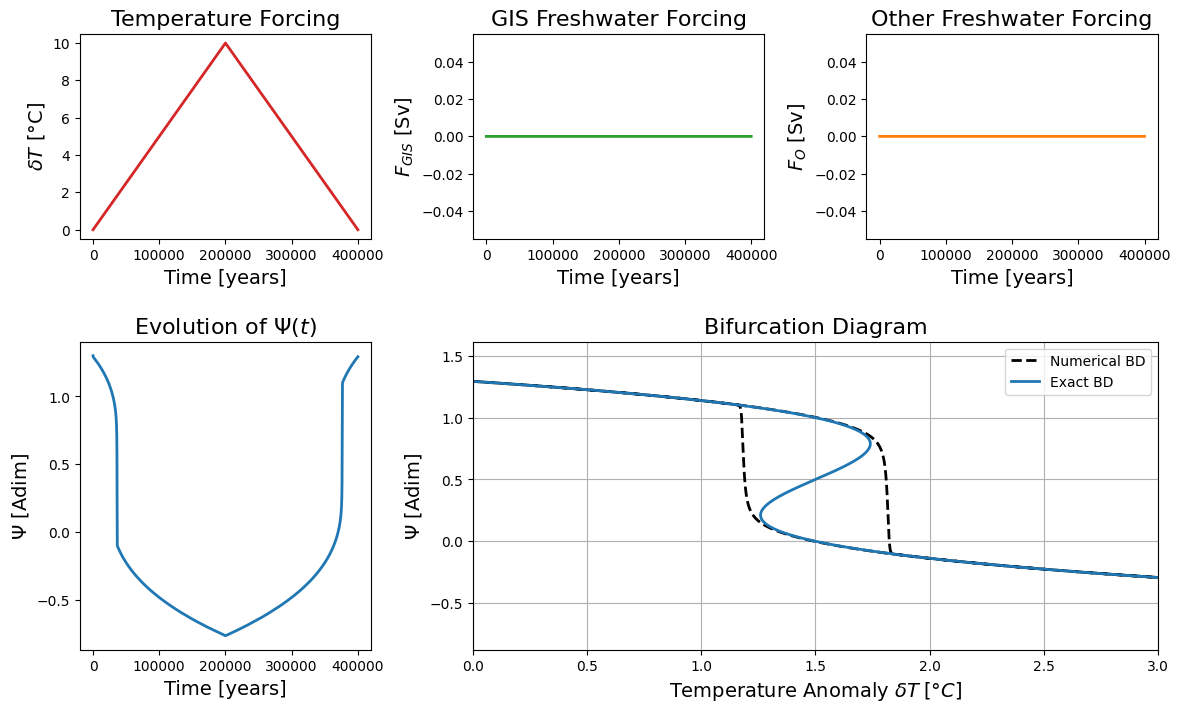

In [349]:
# fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10,8))
# ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

fig = plt.figure(figsize=(11,8))

gs = fig.add_gridspec(nrows=2,ncols=3, figure=fig, width_ratios=[1, 1 ,1], height_ratios=[1, 1.5], left=0.01, right=0.99, wspace=0.35, hspace=0.4)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1:])

#fig.suptitle("AMOC with Param B - Sensibility Experiment A : Validation Test", size=18)

ax1.plot(sol_ExpA.t, amoc_forcing_temperature(sol_ExpA.t), lw=2,color="tab:red")
ax1.set_title("Temperature Forcing", size=16)
ax1.set_xlabel("Time [years]", fontsize=14)
ax1.set_ylabel(r"$\delta T$ [°C]", fontsize=14)

ax2.plot(sol_ExpA.t, amoc_forcing_hosing_GIS(sol_ExpA.t), lw=2,color="tab:green")
ax2.set_title("GIS Freshwater Forcing", size=16)
ax2.set_xlabel("Time [years]", fontsize=14)
ax2.set_ylabel(r"$F_{GIS}$ [Sv]", fontsize=14)

ax3.plot(sol_ExpA.t, amoc_forcing_hosing_O(sol_ExpA.t), lw=2,color="tab:orange")
ax3.set_title("Other Freshwater Forcing", size=16)
ax3.set_xlabel("Time [years]", fontsize=14)
ax3.set_ylabel(r"$F_{O}$ [Sv]", fontsize=14)

ax4.plot(sol_ExpA.t, sol_ExpA.y[0], lw=2,color="tab:blue")
ax4.set_title("Evolution of " + r"$\Psi(t)$", size=16)
ax4.set_xlabel("Time [years]", fontsize=14)
ax4.set_ylabel(r"$\Psi$ [Adim]", fontsize=14)

ax5.plot(amoc_forcing_temperature(sol_ExpA.t), sol_ExpA.y[0], "k--", lw=2, label="Numerical BD")
ax5.plot(T_analy_A,psi_range,color="tab:blue", lw=2, label="Exact BD")
ax5.set_title("Bifurcation Diagram", size=16)
ax5.set_xlabel("Temperature Anomaly " + r"$\delta T \; [°C]$", fontsize=14)
ax5.set_ylabel(r"$\Psi$ [Adim]", fontsize=14)
ax5.set_xlim((0, 3))
ax5.grid()

plt.legend()
#fig.tight_layout()
plt.savefig(save_fig_dir+'/Validation Test v2/EXPA', dpi=600, bbox_inches="tight")
plt.show()

### Step 3.1 - Computing associated critical values 

A first method which is also the easiest is to simply take the critical values visualy. 

Doing so we can roughly consider that :

In [350]:
## Definition of the critical values ##

Psip_ExpA = 0.79
Psim_ExpA = 0.18
Tp = 1.76
Tm = 1.23

## Output ## 
print("------------------------------------------------------------------------")
print("Critical values retrieved visualy based on the hysteresis experiment")
print("------------------------------------------------------------------------")
print("Pisp = {:.3f}".format(Psip_ExpA))
print("Psim = {:.3f}".format(Psim_ExpA))
print("Tp = {:.3f}".format(Tp))
print("Tm = {:.3f}".format(Tm))
print("------------------------------------------------------------------------")

------------------------------------------------------------------------
Critical values retrieved visualy based on the hysteresis experiment
------------------------------------------------------------------------
Pisp = 0.790
Psim = 0.180
Tp = 1.760
Tm = 1.230
------------------------------------------------------------------------


A more rigourous method would be to use a numerical computation

### Step 2.2 - Producing Hysteresis Experiment B

Simulation parameters


In [351]:
t0 = 0  # year for the start of the simulation
tend = 400000  # year for the end of the simulation
dt = 1  # iteration time step in years
y0 = [1.3]  # initial value

Parameterization of the forcing  

In [352]:
# Parameterization of the temperature forcing - T constant
T_forcing_cst_B = 0
amoc_forcing_temperature = interpolate.interp1d([t0,tend],[T_forcing_cst_B,T_forcing_cst_B],bounds_error= False, fill_value=0)

# Parameterization of the GIS freshwater forcing 
F_GIS_max = 4
amoc_forcing_hosing_GIS = interpolate.interp1d([t0,(t0+tend)/2, tend],[0, F_GIS_max, 0],bounds_error= False, fill_value=0)

# Parameterization of the Other freshwater forcing - F_O constant
F_O_cst_B = 0
amoc_forcing_hosing_O = interpolate.interp1d([t0,tend],[F_O_cst_B, F_O_cst_B],bounds_error= False, fill_value=0)

Solver

In [353]:
n = int((tend - t0) / dt) + 1
teval = np.linspace(t0, tend, n)

sol_ExpB = solve_ivp(f_AMOC_valid_test, [t0, tend], y0, method="RK45", rtol=10**-6, t_eval=teval)

Analytical expression of the bifurcation diagram. We are "not supposed" to know that but it will be used to see if our simulations parameters are roughly good in order to retrive the exact bifurcation diagram. It will be also useful four the comparison with the bifurcation diagram of our simplified model.

In [354]:
psi_range = np.linspace(-0.3,1.5,1000)
F_GIS_analy_B = (psi_range**3-a1_star*psi_range**2-b1_star*psi_range-c1_star-d1_star*T_forcing_cst_B-f_star*F_O_cst_B)/e12_star

Plot

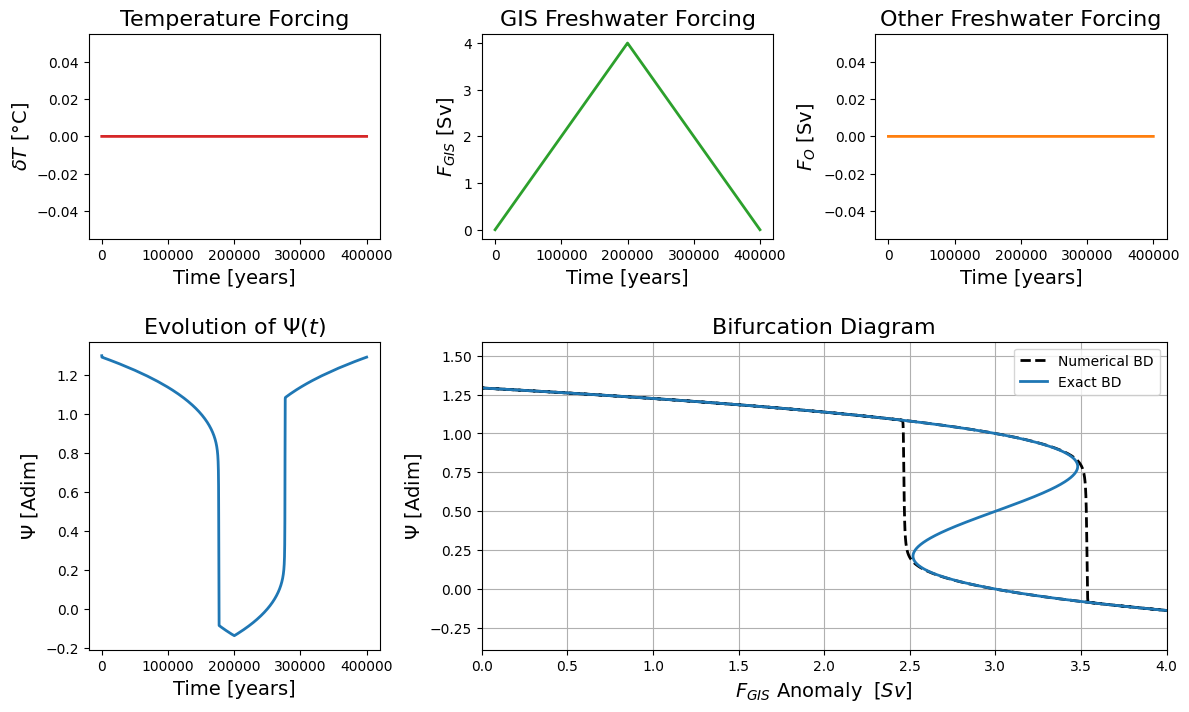

In [355]:
fig = plt.figure(figsize=(11,8))

gs = fig.add_gridspec(nrows=2,ncols=3, figure=fig, width_ratios=[1, 1 ,1], height_ratios=[1, 1.5], left=0.01, right=0.99, wspace=0.35, hspace=0.4)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1:])

#fig.suptitle("AMOC with Param B - Sensibility Experiment B : Validation Test", size=18)

ax1.plot(sol_ExpB.t, amoc_forcing_temperature(sol_ExpB.t), lw=2,color="tab:red")
ax1.set_title("Temperature Forcing", size=16)
ax1.set_xlabel("Time [years]", fontsize=14)
ax1.set_ylabel(r"$\delta T$ [°C]", fontsize=14)

ax2.plot(sol_ExpB.t, amoc_forcing_hosing_GIS(sol_ExpB.t), lw=2,color="tab:green")
ax2.set_title("GIS Freshwater Forcing", size=16)
ax2.set_xlabel("Time [years]", fontsize=14)
ax2.set_ylabel(r"$F_{GIS}$ [Sv]", fontsize=14)

ax3.plot(sol_ExpB.t, amoc_forcing_hosing_O(sol_ExpB.t), lw=2,color="tab:orange")
ax3.set_title("Other Freshwater Forcing", size=16)
ax3.set_xlabel("Time [years]", fontsize=14)
ax3.set_ylabel(r"$F_{O}$ [Sv]", fontsize=14)

ax4.plot(sol_ExpB.t, sol_ExpB.y[0], lw=2,color="tab:blue")
ax4.set_title("Evolution of " + r"$\Psi(t)$", size=16)
ax4.set_xlabel("Time [years]", fontsize=14)
ax4.set_ylabel(r"$\Psi$ [Adim]", fontsize=14)

ax5.plot(amoc_forcing_hosing_GIS(sol_ExpB.t), sol_ExpB.y[0], "k--", lw=2, label="Numerical BD")
ax5.plot(F_GIS_analy_B,psi_range,color="tab:blue", lw=2, label="Exact BD")
ax5.set_title("Bifurcation Diagram", size=16)
ax5.set_xlabel(r"$F_{GIS}$"+" Anomaly "+r"$\; [Sv]$", fontsize=14)
ax5.set_ylabel(r"$\Psi$ [Adim]", fontsize=14)
ax5.set_xlim((0, 4))
ax5.grid()

plt.legend()
#fig.tight_layout()
plt.savefig(save_fig_dir+'/Validation Test v2/EXPB', dpi=600, bbox_inches="tight")
plt.show()

### Step 3.2 - Computing associated critical values 

A first method which is also the easiest is to simply take the critical values visualy. 

Doing so we can roughly consider that :

In [356]:
# Definition of the critical values #
Psip_ExpB = 0.79
Psim_ExpB = 0.18
FGISp = 3.55
FGISm = 2.5 

## Output ## 
print("------------------------------------------------------------------------")
print("Critical values retrieved visualy based on the hysteresis experiment")
print("------------------------------------------------------------------------")
print("Pisp = {:.3f}".format(Psip_ExpB))
print("Psim = {:.3f}".format(Psim_ExpB))
print("FGISp = {:.3f}".format(FGISp))
print("FGISm = {:.3f}".format(FGISm))
print("------------------------------------------------------------------------")

------------------------------------------------------------------------
Critical values retrieved visualy based on the hysteresis experiment
------------------------------------------------------------------------
Pisp = 0.790
Psim = 0.180
FGISp = 3.550
FGISm = 2.500
------------------------------------------------------------------------


A more rigourous method is to use a numerical computation. 

### Step 2.3 - Producing Hysteresis Experiment C

Simulation parameters


In [357]:
t0 = 0  # year for the start of the simulation
tend = 400000  # year for the end of the simulation
dt = 1  # iteration time step in years
y0 = [1.3]  # initial value

Parameterization of the forcing  

In [358]:
# Parameterization of the temperature forcing - T constant
T_forcing_cst_C = 0
amoc_forcing_temperature = interpolate.interp1d([t0,tend],[T_forcing_cst_C,T_forcing_cst_C],bounds_error= False, fill_value=0)

# Parameterization of the GIS freshwater forcing - F_GIS constant
F_GIS_cst_C = 0
amoc_forcing_hosing_GIS = interpolate.interp1d([t0,tend],[F_GIS_cst_C, F_GIS_cst_C],bounds_error= False, fill_value=0)

# Parameterization of the Other freshwater forcing 
F_O_max = 4
amoc_forcing_hosing_O = interpolate.interp1d([t0,(t0+tend)/2, tend],[0, F_O_max, 0],bounds_error= False, fill_value=0)

Solver

In [359]:
sol_ExpC = solve_ivp(f_AMOC_valid_test, [t0, tend], y0, method="RK45", rtol=10**-6, t_eval=teval)

Analytical expression of the bifurcation diagram. We are "not supposed" to know that but it will be used to see if our simulations parameters are roughly good in order to retrive the exact bifurcation diagram. It will be also useful four the comparison with the bifurcation diagram of our simplified model.

In [360]:
psi_range = np.linspace(-0.3,1.5,1000)
F_O_analy_C = (psi_range**3-a1_star*psi_range**2-b1_star*psi_range-c1_star-d1_star*T_forcing_cst_C-e12_star*F_GIS_cst_C)/f_star

Plot

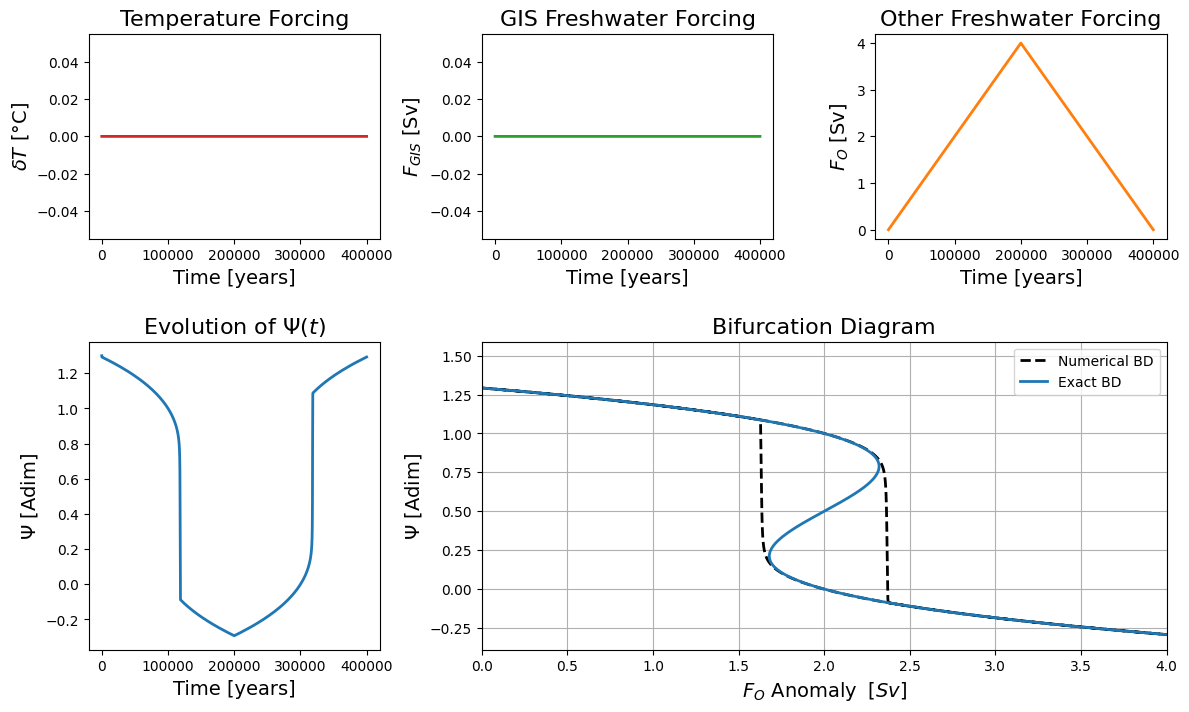

In [361]:
fig = plt.figure(figsize=(11,8))

gs = fig.add_gridspec(nrows=2,ncols=3, figure=fig, width_ratios=[1, 1 ,1], height_ratios=[1, 1.5], left=0.01, right=0.99, wspace=0.35, hspace=0.4)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1:])

#fig.suptitle("AMOC with Param B - Sensibility Experiment C : Validation Test", size=18)

ax1.plot(sol_ExpC.t, amoc_forcing_temperature(sol_ExpC.t), lw=2,color="tab:red")
ax1.set_title("Temperature Forcing", size=16)
ax1.set_xlabel("Time [years]", fontsize=14)
ax1.set_ylabel(r"$\delta T$ [°C]", fontsize=14)

ax2.plot(sol_ExpC.t, amoc_forcing_hosing_GIS(sol_ExpC.t), lw=2,color="tab:green")
ax2.set_title("GIS Freshwater Forcing", size=16)
ax2.set_xlabel("Time [years]", fontsize=14)
ax2.set_ylabel(r"$F_{GIS}$ [Sv]", fontsize=14)

ax3.plot(sol_ExpC.t, amoc_forcing_hosing_O(sol_ExpC.t), lw=2,color="tab:orange")
ax3.set_title("Other Freshwater Forcing", size=16)
ax3.set_xlabel("Time [years]", fontsize=14)
ax3.set_ylabel(r"$F_{O}$ [Sv]", fontsize=14)

ax4.plot(sol_ExpC.t, sol_ExpC.y[0], lw=2,color="tab:blue")
ax4.set_title("Evolution of " + r"$\Psi(t)$", size=16)
ax4.set_xlabel("Time [years]", fontsize=14)
ax4.set_ylabel(r"$\Psi$ [Adim]", fontsize=14)

ax5.plot(amoc_forcing_hosing_O(sol_ExpC.t), sol_ExpC.y[0], "k--", lw=2, label="Numerical BD")
ax5.plot(F_O_analy_C,psi_range,color="tab:blue", lw=2, label="Exact BD")
ax5.set_title("Bifurcation Diagram", size=16)
ax5.set_xlabel(r"$F_{O}$"+" Anomaly "+r"$\; [Sv]$", fontsize=14)
ax5.set_ylabel(r"$\Psi$ [Adim]", fontsize=14)
ax5.set_xlim((0, 4))
ax5.grid()

plt.legend()
#fig.tight_layout()
plt.savefig(save_fig_dir+'/Validation Test v2/EXPC', dpi=600, bbox_inches="tight")
plt.show()

### Step 3.3 - Computing associated critical values 

A first method which is also the easiest is to simply take the critical values visualy. 

Doing so we can roughly consider that :

In [362]:
# Definition of the critical values #
Psip_ExpC = 0.79
Psim_ExpC = 0.18
FOp = 2.33
FOm = 1.63

## Output ## 
print("------------------------------------------------------------------------")
print("Critical values retrieved visualy based on the hysteresis experiment")
print("------------------------------------------------------------------------")
print("Pisp = {:.3f}".format(Psip_ExpC))
print("Psim = {:.3f}".format(Psim_ExpC))
print("FOp = {:.3f}".format(FOp))
print("FOm = {:.3f}".format(FOm))
print("------------------------------------------------------------------------")

------------------------------------------------------------------------
Critical values retrieved visualy based on the hysteresis experiment
------------------------------------------------------------------------
Pisp = 0.790
Psim = 0.180
FOp = 2.330
FOm = 1.630
------------------------------------------------------------------------


A more rigourous method is to use a numerical computation. 

### Step 4 - Computating of the calibrated coefficient based on the module

Now based on the critical bifurcations points coordinates from the two hysteres experiment we will "forgot" from which model them comes and only use the coordinates. We want to set those coordinates as input of our calibration algorithm and see if we can retrieve the "forgoten" coefficients. 

In [363]:
valid_test_AMOC_crit_params = [Psip_ExpA,Psim_ExpA,Tp,Tm,FGISp,FGISm,FOp,FOm,50,50]
valid_test_calib_coef = calib_module_AMOC_ParamB(valid_test_AMOC_crit_params[0], valid_test_AMOC_crit_params[1], valid_test_AMOC_crit_params[2], valid_test_AMOC_crit_params[3], valid_test_AMOC_crit_params[4], valid_test_AMOC_crit_params[5], valid_test_AMOC_crit_params[6] , valid_test_AMOC_crit_params[7],F_GIS_cst_A, F_O_cst_A, T_forcing_cst_B, F_O_cst_B, T_forcing_cst_C, F_GIS_cst_C)

a_AMOC = valid_test_calib_coef[0]
b_AMOC = valid_test_calib_coef[1]
c_AMOC = valid_test_calib_coef[6]
c_bis1 = valid_test_calib_coef[6]
c_bis2 = valid_test_calib_coef[7]
d_AMOC = valid_test_calib_coef[2]
e_AMOC = valid_test_calib_coef[3]
f_AMOC = valid_test_calib_coef[4]

### Step 5 - Comparison between initial data and simplified model

#### Coefficient comparison

In [364]:
## Global error computation ## 
err = np.sqrt((a1_star-a_AMOC)**2 + (b1_star-b_AMOC)**2 + (c1_star-c_AMOC)**2 + (d1_star-d_AMOC)**2 + (e12_star-e_AMOC)**2 + (f_star-f_AMOC)**2)

## Output ##
print("-----------------------------------------------------------")
print("Original arbitrarily fixed coefficient values")
print("-----------------------------------------------------------")
print("a_star = {:.3f}".format(a1_star))
print("b_star = {:.3f}".format(b1_star))
print("c_star = {:.3f}".format(c1_star))
print("d_star = {:.3f}".format(d1_star))
print("e_star = {:.3f}".format(e12_star))
print("f_star = {:.3f}".format(f_star))
print("-----------------------------------------------------------")
print("Calibrated coefficient values")
print("-----------------------------------------------------------")
print("a = {:.3f}".format(a_AMOC))
print("b = {:.3f}".format(b_AMOC))
print("c = {:.3f}".format(c_AMOC))
print("c_bis1 = {:.3f}".format(c_bis1))
print("c_bis2 = {:.3f}".format(c_bis2))
print("d = {:.3f}".format(d_AMOC))
print("e = {:.3f}".format(e_AMOC))
print("f = {:.3f}".format(f_AMOC))
print("------------------------------------------------------------------")
print("Global error between initial and calibrated coeficients = {:.3f}".format(err))
print("Error on coef a = {:.2f}%".format(np.abs(((a_AMOC-a1_star)/a_AMOC))*100))
print("Error on coef b = {:.2f}%".format(np.abs(((b_AMOC-b1_star))/b_AMOC)*100))
print("Error on coef c = {:.2f}%".format(np.abs(((c_AMOC-c1_star))/c_AMOC)*100))
print("Error on coef d = {:.2f}%".format(np.abs(((d_AMOC-d1_star))/d_AMOC)*100))
print("Error on coef e = {:.2f}%".format(np.abs(((e_AMOC-e12_star))/e_AMOC)*100))
print("Error on coef f = {:.2f}%".format(np.abs(((f_AMOC-f_star))/f_AMOC)*100))
print("------------------------------------------------------------------")

-----------------------------------------------------------
Original arbitrarily fixed coefficient values
-----------------------------------------------------------
a_star = 1.500
b_star = -0.500
c_star = 0.300
d_star = -0.200
e_star = -0.100
f_star = -0.150
-----------------------------------------------------------
Calibrated coefficient values
-----------------------------------------------------------
a = 1.455
b = -0.427
c = 0.306
c_bis1 = 0.306
c_bis2 = 0.300
d = -0.214
e = -0.108
f = -0.162
------------------------------------------------------------------
Global error between initial and calibrated coeficients = 0.089
Error on coef a = 3.09%
Error on coef b = 17.21%
Error on coef c = 1.86%
Error on coef d = 6.60%
Error on coef e = 7.48%
Error on coef f = 7.48%
------------------------------------------------------------------


#### Bifurcation Diagram comparison
Computation of the analytic bifurcation diagram for temperature based on the calibration module

In [365]:
T_calib_module = (psi_range**3-a_AMOC*psi_range**2-b_AMOC*psi_range-c_AMOC-e_AMOC*F_GIS_cst_A-f_AMOC*F_O_cst_A)/d_AMOC

Plot

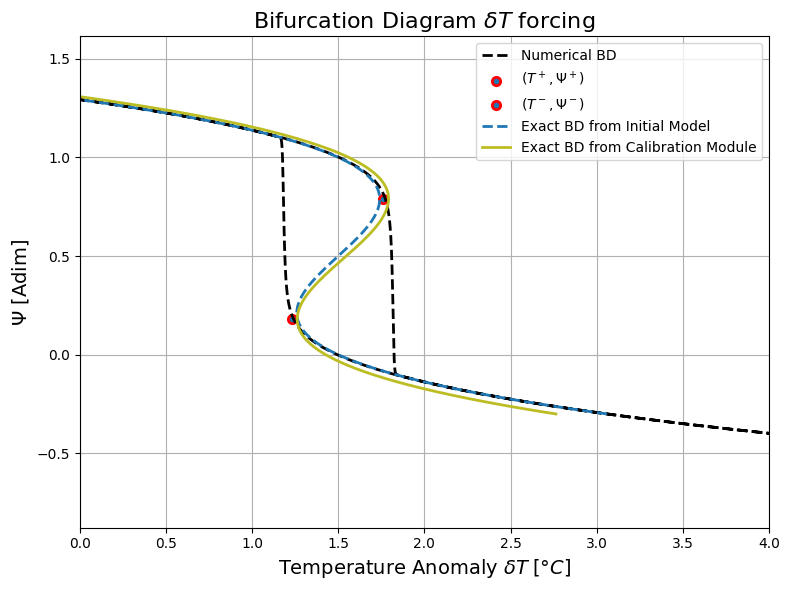

In [366]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

amoc_forcing_temperature = interpolate.interp1d([t0,(t0+tend)/2,tend],[0,T_forcing_max,0],bounds_error= False, fill_value=0)

ax.plot(amoc_forcing_temperature(sol_ExpA.t), sol_ExpA.y[0], "k--", lw=2, label="Numerical BD")
plt.scatter(Tp, Psip_ExpA, marker='o', color="#1f77b4", linewidths=2, edgecolors="red", label=r"$(T^+, \Psi^+)$")
plt.scatter(Tm, Psim_ExpA, marker='o', color="#1f77b4", linewidths=2, edgecolors="red", label=r"$(T^-, \Psi^-)$")
ax.plot(T_analy_A,psi_range,'--',color="tab:blue", lw=2, label="Exact BD from Initial Model")
ax.plot(T_calib_module,psi_range,color="tab:olive", lw=2, label="Exact BD from Calibration Module")
ax.set_title("Bifurcation Diagram " + r"$\delta T $ forcing", size=16)
ax.set_xlabel("Temperature Anomaly " + r"$\delta T \; [°C]$", fontsize=14)
ax.set_ylabel(r"$\Psi$ [Adim]", fontsize=14)
ax.set_xlim((0, 4))
ax.grid()

plt.legend()
fig.tight_layout()
plt.savefig(save_fig_dir+'/Validation Test v2/Bif_diag_Comp_Temp', dpi=600, bbox_inches="tight")
plt.show()

Computation of the analytic bifurcation diagram for freshwater $F_{GIS}$ based on the calibration module

In [367]:
F_GIS_calib_module = (psi_range**3-a_AMOC*psi_range**2-b_AMOC*psi_range-c_AMOC-d_AMOC*T_forcing_cst_B-f_AMOC*F_O_cst_B)/e_AMOC

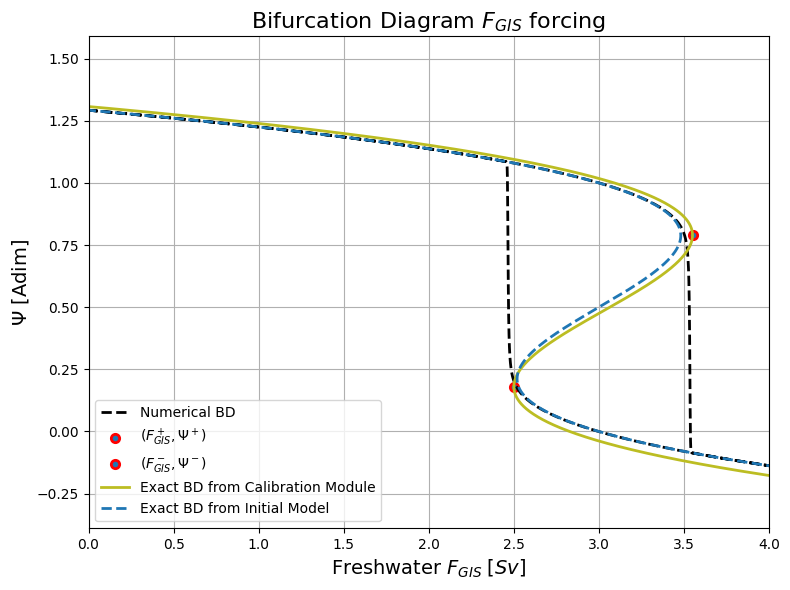

In [368]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

amoc_forcing_hosing_GIS = interpolate.interp1d([t0,(t0+tend)/2, tend],[0, F_GIS_max, 0],bounds_error= False, fill_value=0)

ax.plot(amoc_forcing_hosing_GIS(sol_ExpB.t), sol_ExpB.y[0], "k--", lw=2, label="Numerical BD")
plt.scatter(FGISp, Psip_ExpB, marker='o', color="#1f77b4", linewidths=2, edgecolors="red", label=r"$(F_{GIS}^+, \Psi^+)$")
plt.scatter(FGISm, Psim_ExpB, marker='o', color="#1f77b4", linewidths=2, edgecolors="red", label=r"$(F_{GIS}^-, \Psi^-)$")
ax.plot(F_GIS_calib_module,psi_range,color="tab:olive", lw=2, label="Exact BD from Calibration Module")
ax.plot(F_GIS_analy_B,psi_range,'--',color="tab:blue", lw=2, label="Exact BD from Initial Model")
ax.set_title("Bifurcation Diagram " + r"$F_{GIS} $ forcing", size=16)
ax.set_xlabel("Freshwater " + r"$F_{GIS} \; [Sv]$", size=14)
ax.set_ylabel(r"$\Psi$ [Adim]", size=14)
ax.set_xlim((0, 4))
ax.grid()

plt.legend()
fig.tight_layout()
plt.savefig(save_fig_dir+'/Validation Test v2/Bif_diag_Comp_FGIS', dpi=600, bbox_inches="tight")
plt.show()

Computation of the analytic bifurcation diagram for freshwater $F_{O}$ based on the calibration module

In [369]:
F_O_calib_module = (psi_range**3-a_AMOC*psi_range**2-b_AMOC*psi_range-c_AMOC-d_AMOC*T_forcing_cst_C-e_AMOC*F_GIS_cst_C)/f_AMOC

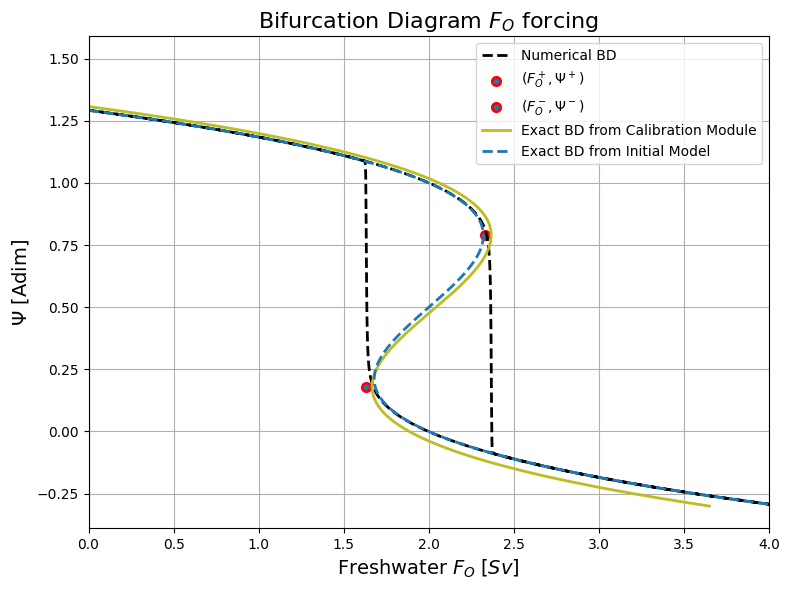

In [370]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

amoc_forcing_hosing_O = interpolate.interp1d([t0,(t0+tend)/2, tend],[0, F_GIS_max, 0],bounds_error= False, fill_value=0)

ax.plot(amoc_forcing_hosing_O(sol_ExpC.t), sol_ExpC.y[0], "k--", lw=2, label="Numerical BD")
plt.scatter(FOp, Psip_ExpC, marker='o', color="#1f77b4", linewidths=2, edgecolors="red", label=r"$(F_{O}^+, \Psi^+)$")
plt.scatter(FOm, Psim_ExpC, marker='o', color="#1f77b4", linewidths=2, edgecolors="red", label=r"$(F_{O}^-, \Psi^-)$")
ax.plot(F_O_calib_module,psi_range,color="tab:olive", lw=2, label="Exact BD from Calibration Module")
ax.plot(F_O_analy_C,psi_range,'--',color="tab:blue", lw=2, label="Exact BD from Initial Model")
ax.set_title("Bifurcation Diagram " + r"$F_{O} $ forcing", size=16)
ax.set_xlabel("Freshwater " + r"$F_{O} \; [Sv]$", size=14)
ax.set_ylabel(r"$\Psi$ [Adim]", size=14)
ax.set_xlim((0, 4))
ax.grid()

plt.legend()
fig.tight_layout()
plt.savefig(save_fig_dir+'/Validation Test v2/Bif_diag_Comp_FO', dpi=600, bbox_inches="tight")
plt.show()

---
## Calibration on cGenie experiments
---

Now that the calibration of the tipping module seems to work well we are going to calibrate our AMOC model based on real cGenie experiments. 

### Loading and Plot cGenie hysteresis  

In [371]:
import pandas as pd

Loading of data

In [372]:
################################# Personnal data path #####################################

personal_data_path_ExpA = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_CO2/biogem/"
personal_data_path_ExpB = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_freshwater_flux_50_and_70_N_0.2Sv_sal_cst/biogem/"
personal_data_path_ExpC = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_freshwater_flux_0.2Sv_sal_cst/biogem/"
save_fig_dir = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures/cGenie Calibration/"

###################################### Reading data ######################################

############################# Exp A ##################################

## CO2 Forcing ## 
forcing_CO_2 = pd.read_table(personal_data_path_ExpA+"biogem_series_atm_pCO2_mod.res",header=1,sep=",")
global_pCO2 = forcing_CO_2["0.279984E-03"]
year_ExpA = forcing_CO_2["0.500"]
time_ramp_up_ExpA = year_ExpA[0:499]
time_ramp_down_ExpA = year_ExpA[498:]

## Temperature Forcing ## 
forcing_temp = pd.read_table(personal_data_path_ExpA+"biogem_series_atm_temp.res", header=1, sep=",")
global_sat = forcing_temp["12.268095"]

## Oceanic Temperature ## 

ocn_temp_data_ExpA = pd.read_table(personal_data_path_ExpA+'biogem_series_ocn_temp.res',header=1,sep=',')
ocn_temp_ExpA = ocn_temp_data_ExpA["3.543834"]


## Global and Atlantic Overturning Circulation ## 

opsi_ExpA = pd.read_table(personal_data_path_ExpA+"biogem_series_misc_opsi.res",header=1,sep=",")
glob_min_overt_ExpA = opsi_ExpA["-35.594"]
glob_max_overt_ExpA = opsi_ExpA["37.735"]
atl_min_overt_ExpA = opsi_ExpA["-0.566"]
atl_max_overt_ExpA = opsi_ExpA["14.398"]

############################# Exp B ##################################

## Oceanic Temperature ## 

ocn_temp_data_ExpB = pd.read_table(personal_data_path_ExpB+'biogem_series_ocn_temp.res',header=1,sep=',')
year_ExpB = ocn_temp_data_ExpB["0.500"]
time_ramp_up_ExpB = year_ExpA[0:451]
time_ramp_down_ExpB = year_ExpA[450:]
ocn_temp_ExpB = ocn_temp_data_ExpB["4.674478"]

## Temperature response ## 

atm_temp_ExpB = pd.read_table(personal_data_path_ExpB+"biogem_series_atm_temp_mod.res",header=1,sep=',')
global_sat_ExpB = atm_temp_ExpB["12.265689"]

## Global and Atlantic Overturning Circulation ## 

opsi_ExpB = pd.read_table(personal_data_path_ExpB+"biogem_series_misc_opsi.res",header=1,sep=",")
glob_min_overt_ExpB = opsi_ExpB["-35.476"]
glob_max_overt_ExpB = opsi_ExpB["36.925"]
atl_min_overt_ExpB = opsi_ExpB["-0.191"]
atl_max_overt_ExpB = opsi_ExpB["21.615"]

############################# Exp C ##################################

## Temperature response ## 

atm_temp_ExpC = pd.read_table(personal_data_path_ExpC+"biogem_series_atm_temp.res",header=1,sep=',')
global_sat_ExpC = atm_temp_ExpC["12.269550"]

## Global and Atlantic Overturning Circulation ## 

opsi_ExpC = pd.read_table(personal_data_path_ExpC+"biogem_series_misc_opsi.res",header=1,sep=",")
glob_min_overt_ExpC = opsi_ExpC["-35.220"]
glob_max_overt_ExpC = opsi_ExpC["37.422"]
atl_min_overt_ExpC = opsi_ExpC["-0.452"]
atl_max_overt_ExpC = opsi_ExpC["19.296"]

#### Hyseresis experiments
##### Temperature Forcing Bifurcation Diagram

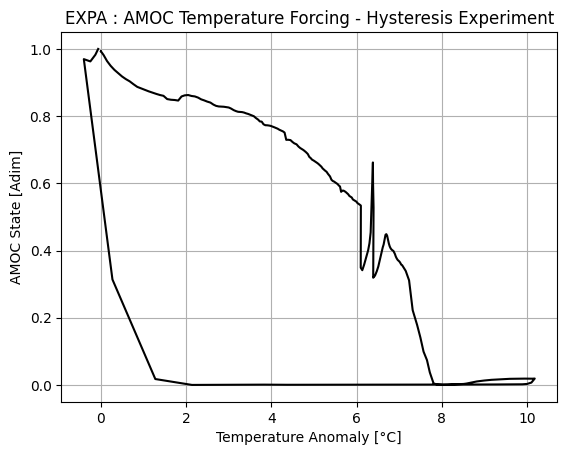

In [373]:
### Computation of the global surface temperature anomaly ###
eq_temp_cGenie = global_sat[0]
global_sat_anomaly_cGenie = global_sat - eq_temp_cGenie

## Normalisation of the intensity ##
norm_atl_max_overt_ExpA = atl_max_overt_ExpA/max(atl_max_overt_ExpA)

## Plot bifurcation diagram experiment A ## 
plt.plot(global_sat_anomaly_cGenie, norm_atl_max_overt_ExpA, color="black")
plt.title("EXPA : AMOC Temperature Forcing - Hysteresis Experiment")
plt.xlabel("Temperature Anomaly [°C]")
plt.ylabel("AMOC State [Adim]")
plt.grid()
plt.savefig(save_fig_dir+'EXPA_bif_diag',dpi=600)
plt.show()

##### $F_{GIS}$ Forcing Bifurcation Diagram

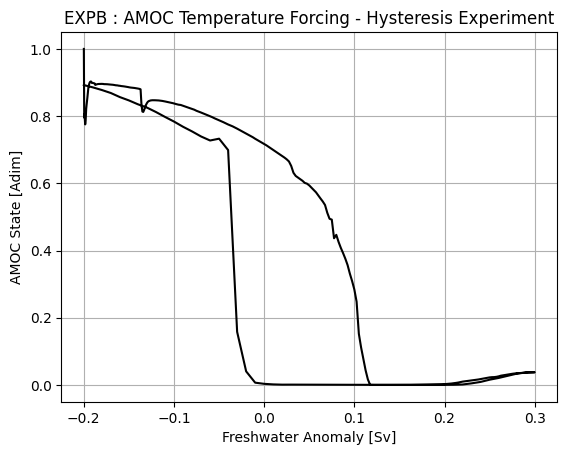

In [374]:
### Construction of the Hosing Profile ###
t_0 = 0
t_half = 10000
t_f = 20000
hosing_min = -0.2
hosing_max = 0.3

time_ramp_up = np.arange(t_0,t_half,1)
time_ramp_down = np.arange(t_half,t_f,1)
time = np.arange(t_0,t_f,1)

freshwater_flux_ramp_up_hosing = interpolate.interp1d([t_0,t_half],[hosing_min,hosing_max],bounds_error= False, fill_value=0)
frswat_flux_ramp_up = freshwater_flux_ramp_up_hosing(time_ramp_up)

freshwater_flux_ramp_down_hosing = interpolate.interp1d([t_half,t_f],[hosing_max,hosing_min],bounds_error= False, fill_value=0)
frswat_flux_ramp_down = freshwater_flux_ramp_down_hosing(time_ramp_down)

hosing_forcing = np.concatenate((frswat_flux_ramp_up,frswat_flux_ramp_down))

### Hosing Forcing Interpolation ###
hosing_forcing_it = np.interp(year_ExpB, np.arange(t_0,t_f,1), hosing_forcing)

## Normalisation of the intensity ##
norm_atl_max_overt_ExpB = atl_max_overt_ExpB/max(atl_max_overt_ExpB)

### Plot ### 
plt.plot(hosing_forcing_it,norm_atl_max_overt_ExpB,color='black')
plt.title("EXPB : AMOC Temperature Forcing - Hysteresis Experiment")
plt.xlabel("Freshwater Anomaly [Sv]")
plt.ylabel("AMOC State [Adim]")
plt.grid()
plt.savefig(save_fig_dir+'EXPB_bif_diag',dpi=600)
plt.show()

##### $F_O$ Forcing Bifurcation Diagram

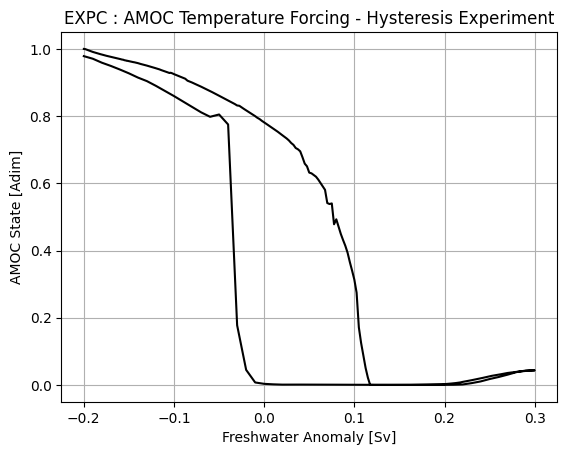

In [375]:
### Hosing Forcing Interpolation ###
hosing_forcing_it = np.interp(year_ExpB, np.arange(t_0,t_f,1), hosing_forcing)

## Normalisation of the intensity ##
norm_atl_max_overt_ExpC = atl_max_overt_ExpC/max(atl_max_overt_ExpC)

### Plot ###
plt.plot(hosing_forcing_it,norm_atl_max_overt_ExpC,color='black')
plt.title("EXPC : AMOC Temperature Forcing - Hysteresis Experiment")
plt.xlabel("Freshwater Anomaly [Sv]")
plt.ylabel("AMOC State [Adim]")
plt.grid()
plt.savefig(save_fig_dir+'EXPC_bif_diag',dpi=600)
plt.show()

### Calibration

#### Critical Coordinates Retrieval

Now we want to retrieve the coordinates of the critical bifurcations points. 

Conversaly to the retrieval based on simplified model's hysteres it will be less easier in this case since the cGenie hystereses are more complex because they are more processed based. 

We will still use visual jugement of the positions of those points but also  expert advice, particularly from J. Gérard, who is accustomed to working with cGenie and AMOC and has already conducted other sensitivity experiments to better identify the location of irreversible tipping points.

In [376]:
##### Definition of the critical values #####

### EXP A ###

#Psip_ExpA = 0.449 # exact value 
Psip_ExpA = 0.6 # volontary higher value to lift up the upper branch for PI calibration
#Psim_ExpA = 0.317
Psim_ExpA = 0.0220 # exact value 
#Tp = 6.70 # exact value 
Tp = 5.5 # volontary higher value to lift up the upper branch for PI calibration
#Tm = 0.245 
Tm = 1.27

### EXP B ###
Psip_ExpB = 0.45
Psim_ExpB = 0.16
#FGISp = 0.08 # exact value 
#FGISp = 0.03 # volontary lower value to optimize and correct the biais
FGISp=0.045 # best fit v2.0
#FGISm = -0.0305 # exact value
#FGISm = -0.1 # volontary lower value to optimize and correct the biais
FGISm = -0.015 # best fit v2.0
### EXP C ### 
Psip_ExpC = 0.495
Psim_ExpC = 0.18
#FOp = 0.08 # exact value 
FOp = 0.065 # volontary lower value to optimize and correct the biais
#FOm = -0.0305 # exact value 
FOm = -0.015 # volontary lower value to optimize and correct the biais

##### Output #####
print("------------------------------------------------------------------------")
print("Critical values retrieved visualy based on the hysteresis experiment")
print("------------------------------------------------------------------------")
print("----------------------------")
print("Pisp_ExpA = {:.3f}".format(Psip_ExpA))
print("Psim_ExpA = {:.3f}".format(Psim_ExpA))
print("Tp = {:.3f}".format(Tp))
print("Tm = {:.3f}".format(Tm))
print("----------------------------")
print("Pisp_ExpB = {:.3f}".format(Psip_ExpB))
print("Psim_ExpB = {:.3f}".format(Psim_ExpB))
print("FGISp = {:.3f}".format(FGISp))
print("FGISm = {:.3f}".format(FGISm))
print("----------------------------")
print("Pisp_ExpC = {:.3f}".format(Psip_ExpC))
print("Psim_ExpC = {:.3f}".format(Psim_ExpC))
print("FOp = {:.3f}".format(FOp))
print("FOm = {:.3f}".format(FOm))
print("------------------------------------------------------------------------")

------------------------------------------------------------------------
Critical values retrieved visualy based on the hysteresis experiment
------------------------------------------------------------------------
----------------------------
Pisp_ExpA = 0.600
Psim_ExpA = 0.022
Tp = 5.500
Tm = 1.270
----------------------------
Pisp_ExpB = 0.450
Psim_ExpB = 0.160
FGISp = 0.045
FGISm = -0.015
----------------------------
Pisp_ExpC = 0.495
Psim_ExpC = 0.180
FOp = 0.065
FOm = -0.015
------------------------------------------------------------------------


Plot

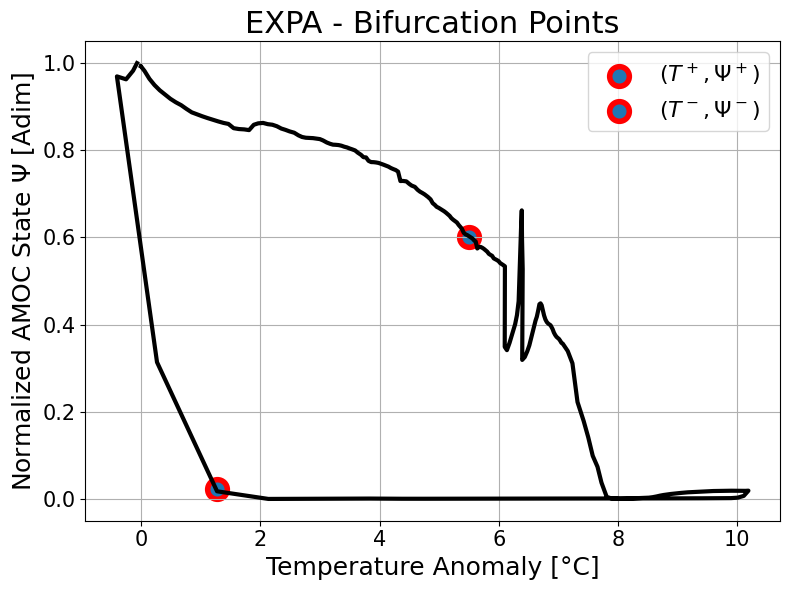

In [377]:
## Plot bifurcation diagram experiment A ## 
plt.figure(figsize=(8,6))
plt.plot(global_sat_anomaly_cGenie, norm_atl_max_overt_ExpA, color="black",lw=3)
plt.scatter(Tp, Psip_ExpA, marker='o', color="#1f77b4",linewidths=4,s=200, edgecolors="red", label=r"$(T^+, \Psi^+)$")
plt.scatter(Tm, Psim_ExpA, marker='o', color="#1f77b4",linewidths=4,s=200, edgecolors="red", label=r"$(T^-, \Psi^-)$")
plt.title("EXPA - Bifurcation Points",fontsize=22)
plt.xlabel("Temperature Anomaly [°C]",fontsize=18)
plt.ylabel("Normalized AMOC State "+r"$\Psi$ "+"[Adim]",fontsize=18)
plt.tick_params(axis='both',labelsize=15)
plt.grid()
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(save_fig_dir+'EXPA_bif_diag_cp2',dpi=300)
plt.show()

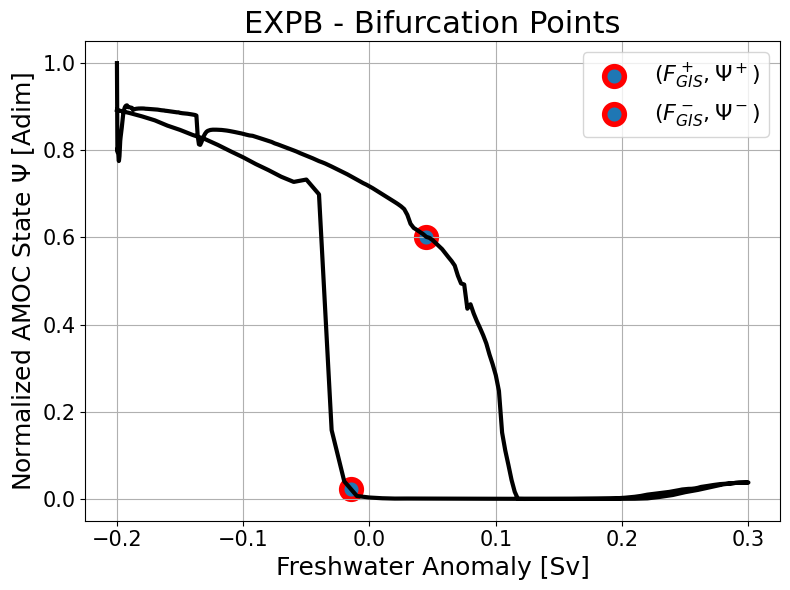

In [378]:
### Plot ### 
plt.figure(figsize=(8,6))
plt.plot(hosing_forcing_it,norm_atl_max_overt_ExpB,color='black',lw=3)
plt.scatter(FGISp, Psip_ExpA, marker='o', color="#1f77b4",linewidths=4,s=200, edgecolors="red", label=r"$(F_{GIS}^+, \Psi^+)$")
plt.scatter(FGISm, Psim_ExpA, marker='o', color="#1f77b4",linewidths=4,s=200, edgecolors="red", label=r"$(F_{GIS}^-, \Psi^-)$")
plt.title("EXPB - Bifurcation Points",fontsize=22)
plt.xlabel("Freshwater Anomaly [Sv]",fontsize=18)
plt.ylabel("Normalized AMOC State "+r"$\Psi$ "+"[Adim]",fontsize=18)
plt.tick_params(axis='both',labelsize=15)
plt.grid()
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig(save_fig_dir+'EXPB_bif_diag_cp',dpi=300)
plt.show()

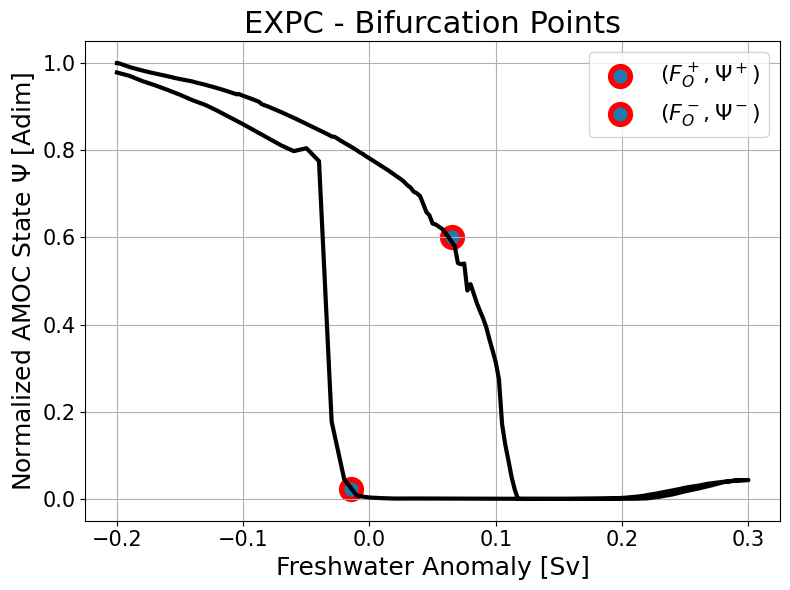

In [379]:
### Plot ###
plt.figure(figsize=(8,6))
plt.plot(hosing_forcing_it,norm_atl_max_overt_ExpC,color='black',lw=3)
plt.scatter(FOp, Psip_ExpA, marker='o', color="#1f77b4",linewidths=4,s=200, edgecolors="red", label=r"$(F_{O}^+, \Psi^+)$")
plt.scatter(FOm, Psim_ExpA, marker='o', color="#1f77b4",linewidths=4,s=200, edgecolors="red", label=r"$(F_{O}^-, \Psi^-)$")
plt.title("EXPC - Bifurcation Points",fontsize=22)
plt.xlabel("Freshwater Anomaly [Sv]",fontsize=18)
plt.ylabel("Normalized AMOC State "+r"$\Psi$ "+"[Adim]",fontsize=18)
plt.grid()
plt.legend(fontsize=16)
plt.tick_params(axis='both',labelsize=15)
plt.tight_layout()
plt.savefig(save_fig_dir+'EXPC_bif_diag_cp',dpi=600)
plt.show()

#### Tipping Module Calibration
##### Coefficients calibration

In [380]:
## Definition of the constant forcing values for the differents sensibility experiment ##

F_GIS_cst_A = 0
F_O_cst_A = 0
T_forcing_cst_B = 0
F_O_cst_B = 0
T_forcing_cst_C = 0
F_GIS_cst_C = 0

In [381]:
## Hypothesis of the mean of the critical value for the \Psi^{\pm} ##
hyp_mean_crit_val = False 

if hyp_mean_crit_val:
    Psip = (Psip_ExpA+Psip_ExpB+Psip_ExpC)/3
    Psim = (Psim_ExpA+Psim_ExpB+Psim_ExpC)/3
else:
    Psip = Psip_ExpA
    Psim = Psim_ExpA

## Definition of the all set of critical values and calibration ##

cGenie_crit_params = [Psip,Psim,Tp,Tm,FGISp,FGISm,FOp,FOm,50,50]
valid_test_calib_coef = calib_module_AMOC_ParamB(cGenie_crit_params[0], cGenie_crit_params[1], cGenie_crit_params[2], cGenie_crit_params[3], cGenie_crit_params[4], cGenie_crit_params[5], cGenie_crit_params[6] , cGenie_crit_params[7],F_GIS_cst_A, F_O_cst_A, T_forcing_cst_B, F_O_cst_B, T_forcing_cst_C, F_GIS_cst_C)

a_AMOC = valid_test_calib_coef[0]
b_AMOC = valid_test_calib_coef[1]
c_AMOC = valid_test_calib_coef[5]
c_bis1 = valid_test_calib_coef[6]
c_bis2 = valid_test_calib_coef[7]
d_AMOC = valid_test_calib_coef[2]
e_AMOC = valid_test_calib_coef[3]
f_AMOC = valid_test_calib_coef[4]

print("-----------------------------------------------------------")
print("Calibrated coefficient values")
print("-----------------------------------------------------------")
print("a = {:.3f}".format(a_AMOC))
print("b = {:.3f}".format(b_AMOC))
print("c = {:.3f}".format(c_AMOC))
print("c_bis1 = {:.3f}".format(c_bis1))
print("c_bis2 = {:.3f}".format(c_bis2))
print("d = {:.3f}".format(d_AMOC))
print("e = {:.3f}".format(e_AMOC))
print("f = {:.3f}".format(f_AMOC))
print("------------------------------------------------------------------")

-----------------------------------------------------------
Calibrated coefficient values
-----------------------------------------------------------
a = 0.933
b = -0.040
c = 0.029
c_bis1 = -0.024
c_bis2 = -0.018
d = -0.023
e = -1.609
f = -1.207
------------------------------------------------------------------


##### Bifurcation Diagram and hysteresis

In [382]:
### Definition of the different branches of stability ###

def Tpsi_funct_psi(psi):
    return ((psi**3-a_AMOC*(psi**2)-b_AMOC*psi-c_AMOC-e_AMOC*F_GIS_cst_A-f_AMOC*F_O_cst_A)*(1/d_AMOC))
def FGIS_funct_psi(psi):
    return ((psi**3-a_AMOC*(psi**2)-b_AMOC*psi-c_AMOC-d_AMOC*T_forcing_cst_B-f_AMOC*F_O_cst_B)*(1/e_AMOC))
def FO_funct_psi(psi):
    return ((psi**3-a_AMOC*psi**2-b_AMOC*psi-c_AMOC-d_AMOC*T_forcing_cst_C-e_AMOC*F_GIS_cst_C)*(1/f_AMOC))

### Computations of unstables branches ###

N=1000
psi_range = np.linspace(0,1,N)
unstable_psi = np.linspace(cGenie_crit_params[1],cGenie_crit_params[0],N)

T_unstable = Tpsi_funct_psi(unstable_psi)
FGIS_unstable = FGIS_funct_psi(unstable_psi)
FO_unstable = FO_funct_psi(unstable_psi)


In [383]:
# Computation of the analytical bifurcation diagram of the simplified model
T_calib_module = (psi_range**3-a_AMOC*psi_range**2-b_AMOC*psi_range-c_AMOC-e_AMOC*F_GIS_cst_A-f_AMOC*F_O_cst_A)/d_AMOC
F_GIS_calib_module = (psi_range**3-a_AMOC*psi_range**2-b_AMOC*psi_range-c_AMOC-d_AMOC*T_forcing_cst_B-f_AMOC*F_O_cst_B)/e_AMOC
F_O_calib_module = (psi_range**3-a_AMOC*psi_range**2-b_AMOC*psi_range-c_AMOC-d_AMOC*T_forcing_cst_C-e_AMOC*F_GIS_cst_C)/f_AMOC

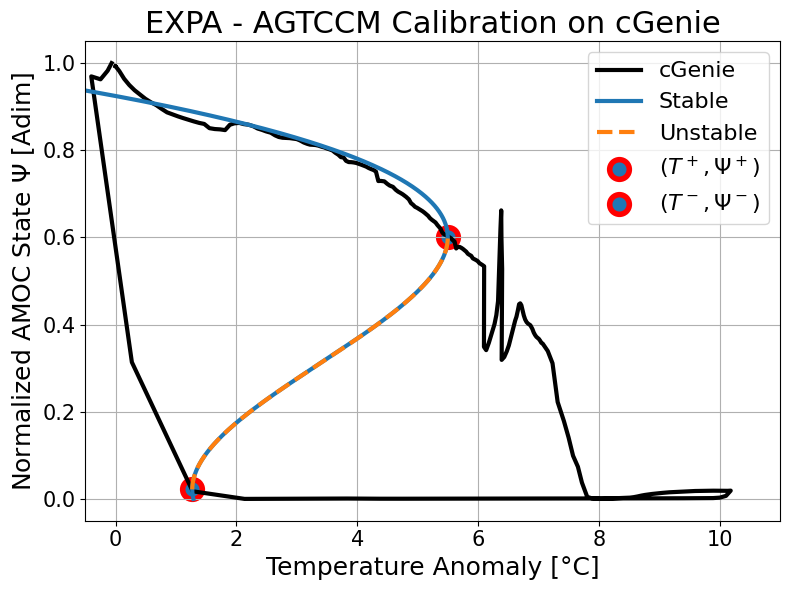

In [384]:
## Plot bifurcation diagram experiment A ## 
plt.figure(figsize=(8,6))
plt.plot(global_sat_anomaly_cGenie, norm_atl_max_overt_ExpA, color="black",label='cGenie',lw=3)
plt.plot(T_calib_module,psi_range,color='tab:blue',label='Stable',lw=3)
plt.plot(T_unstable,unstable_psi,color='tab:orange',linestyle='dashed',label='Unstable',lw=3)
plt.scatter(Tp, Psip, marker='o', color="#1f77b4",linewidths=4,s=200,edgecolors="red", label=r"$(T^+, \Psi^+)$")
plt.scatter(Tm, Psim, marker='o', color="#1f77b4",linewidths=4,s=200,edgecolors="red", label=r"$(T^-, \Psi^-)$")
plt.title("EXPA - AGTCCM Calibration on cGenie",fontsize=22)
plt.xlabel("Temperature Anomaly [°C]",fontsize=18)
plt.xlim(-0.5,11)
plt.ylabel("Normalized AMOC State "+r"$\Psi$ "+"[Adim]",fontsize=18)
plt.tick_params(axis='both',labelsize=15)
plt.grid()
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig(save_fig_dir+'EXPA_bif_diag_cp_dif',dpi=400)
plt.show()

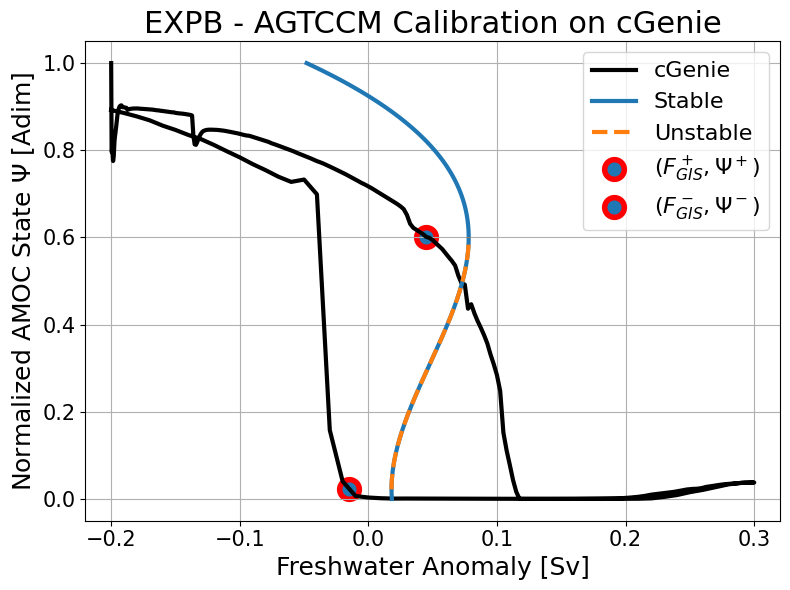

In [385]:
### Plot ### 
plt.figure(figsize=(8,6))
plt.plot(hosing_forcing_it,norm_atl_max_overt_ExpB,color='black',label='cGenie',lw=3)
plt.plot(F_GIS_calib_module,psi_range,color='tab:blue',label='Stable',lw=3)
plt.plot(FGIS_unstable,unstable_psi,color='tab:orange',linestyle='dashed',label='Unstable',lw=3)
plt.scatter(FGISp, Psip_ExpA, marker='o', color="#1f77b4",linewidths=4,s=200, edgecolors="red", label=r"$(F_{GIS}^+, \Psi^+)$")
plt.scatter(FGISm, Psim_ExpA, marker='o', color="#1f77b4",linewidths=4,s=200, edgecolors="red", label=r"$(F_{GIS}^-, \Psi^-)$")
plt.title("EXPB - AGTCCM Calibration on cGenie",fontsize=22)
plt.xlabel("Freshwater Anomaly [Sv]",fontsize=18)
plt.ylabel("Normalized AMOC State "+r"$\Psi$ "+"[Adim]",fontsize=18)
plt.tick_params(axis='both',labelsize=15)
plt.grid()
plt.tight_layout()
plt.legend(fontsize=16)
plt.xlim(-0.22,0.32)
plt.savefig(save_fig_dir+'EXPB_bif_diag_cp_dif',dpi=400)
plt.show()

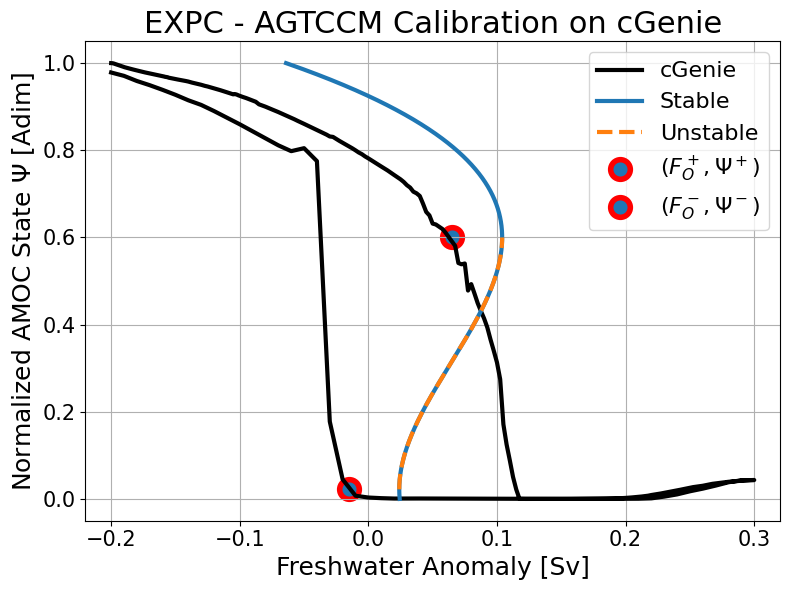

In [386]:
### Plot ###
plt.figure(figsize=(8,6))
plt.plot(hosing_forcing_it,norm_atl_max_overt_ExpC,color='black',label='cGenie',lw=3)
plt.plot(F_O_calib_module,psi_range,color='tab:blue',label='Stable',lw=3)
plt.plot(FO_unstable,unstable_psi,color='tab:orange',linestyle='dashed',label='Unstable',lw=3)
plt.scatter(FOp, Psip_ExpA, marker='o', color="#1f77b4",linewidths=4,s=200, edgecolors="red", label=r"$(F_{O}^+, \Psi^+)$")
plt.scatter(FOm, Psim_ExpA, marker='o', color="#1f77b4",linewidths=4,s=200, edgecolors="red", label=r"$(F_{O}^-, \Psi^-)$")
plt.title("EXPC - AGTCCM Calibration on cGenie",fontsize=22)
plt.xlabel("Freshwater Anomaly [Sv]",fontsize=18)
plt.ylabel("Normalized AMOC State "+r"$\Psi$ "+"[Adim]",fontsize=18)
plt.grid()
plt.tick_params(axis='both',labelsize=15)
plt.legend(fontsize=16)
plt.xlim(-0.22,0.32)
plt.tight_layout()
plt.savefig(save_fig_dir+'EXPC_bif_diag_cp_dif',dpi=400)
plt.show()

---
## Results Analysis
---
### 3D Forcing Space

In [387]:
from mpl_toolkits.mplot3d import Axes3D
import heapq

#### $\Psi(T,F_{GIS})$

/tmp/ipykernel_6066/202866894.py:80: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10.5


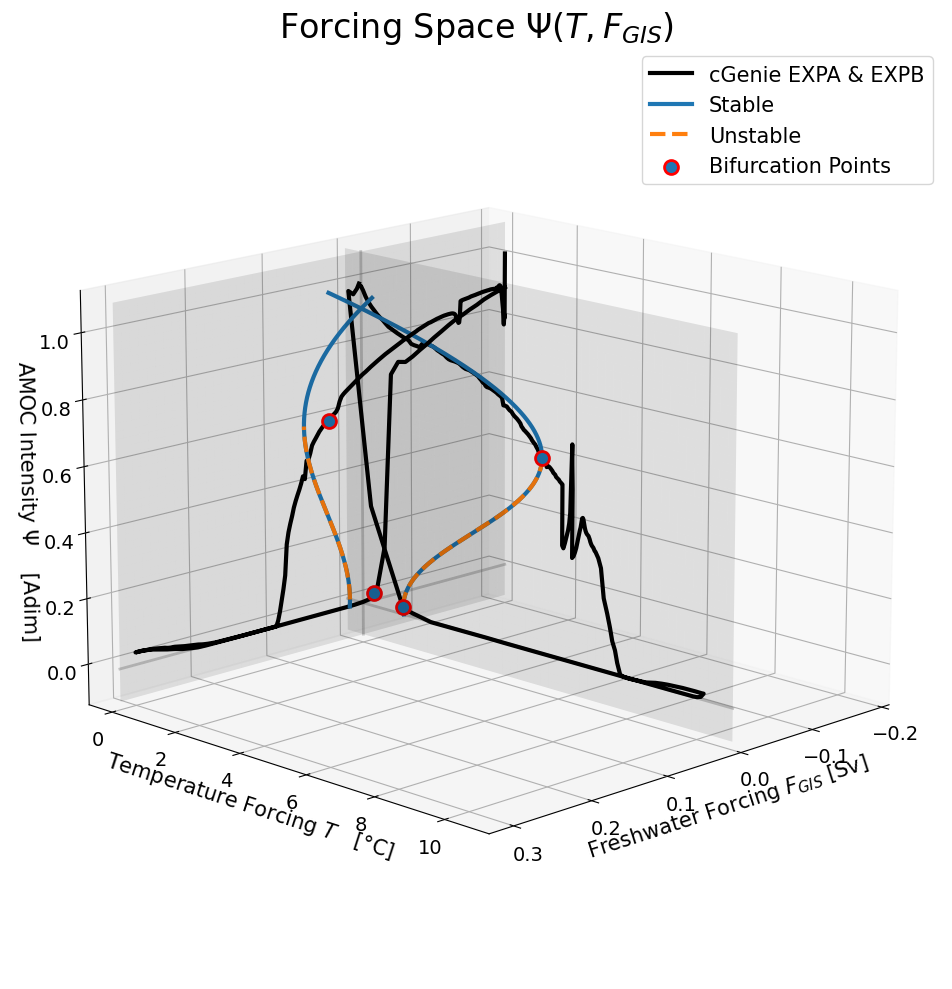

In [388]:
##### Generate data for the 3D plot #####
N = 1000
axis_F_GIS = np.linspace(-0.2,0.32,N)
axis_T = np.linspace(-0.5,11,N)
axis_Psi = np.linspace(-0.1,1.1,N)

bif_extension = False 
psi_range = np.linspace(0,0.95,N)
T_calib_module = (psi_range**3-a_AMOC*psi_range**2-b_AMOC*psi_range-c_AMOC-e_AMOC*F_GIS_cst_A-f_AMOC*F_O_cst_A)/d_AMOC
if bif_extension:
    M = 100
    bif_ext = np.zeros(M)
    T_calib_module = np.concatenate((T_calib_module, bif_ext))
    psi_ext = np.zeros(M)
    psi_range = np.concatenate((psi_range, psi_ext))
    print(T_calib_module)
    print(len(T_calib_module))
F_GIS_calib_module = (psi_range**3-a_AMOC*psi_range**2-b_AMOC*psi_range-c_AMOC-d_AMOC*T_forcing_cst_B-f_AMOC*F_O_cst_B)/e_AMOC
unstable_psi = np.linspace(cGenie_crit_params[1],cGenie_crit_params[0],N)


##### Create a 3D plot #####
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('auto', adjustable='box')

### Plot of the axis straight lines ###
ax.plot3D(axis_F_GIS,np.zeros(N),np.zeros(N),lw=2,color='gray',alpha=0.4)
ax.plot3D(np.zeros(N),axis_T,np.zeros(N),lw=2,color='gray',alpha=0.4)
ax.plot3D(np.zeros(N),np.zeros(N),axis_Psi,lw=2,color='gray',alpha=0.4)

### Plot of 2d plans ###
## T plan ## 
plan_y = axis_T
plan_z = axis_Psi
plan_y, plan_z = np.meshgrid(plan_y,plan_z)
plan_x = np.zeros_like(plan_y)
ax.plot_surface(plan_x, plan_y, plan_z, color='black', alpha=0.1)
## F_GIS plan ## 
plan_x = axis_F_GIS
plan_z = axis_Psi
plan_x, plan_z = np.meshgrid(plan_x,plan_z)
plan_y = np.zeros_like(plan_x)
ax.plot_surface(plan_x, plan_y, plan_z, color='black', alpha=0.1)

### Plot of Temp Forcing Bifurcation Diagram (x=0) ###
ax.plot(xs=np.zeros(len(norm_atl_max_overt_ExpA)),ys=global_sat_anomaly_cGenie,zs=norm_atl_max_overt_ExpA,zdir='z',color='black',label='cGenie EXPA & EXPB',lw=3)
ax.plot(xs=np.zeros(len(T_calib_module)),ys=T_calib_module,zs=psi_range,color='tab:blue',label='Stable',lw=3)
ax.plot(xs=np.zeros(len(T_unstable)),ys=T_unstable,zs=unstable_psi,linestyle='dashed',color='tab:orange',label='Unstable',lw=3)

### Plot of F_GIS Forcing Bifurcation Diagram (y=0) ###
ax.plot(xs=hosing_forcing_it,ys=np.zeros(len(hosing_forcing_it)),zs=norm_atl_max_overt_ExpB,zdir='z',color='black',lw=3)
ax.plot(xs=F_GIS_calib_module,ys=np.zeros(len(F_GIS_calib_module)),zs=psi_range,color='tab:blue',lw=3)
ax.plot(xs=FGIS_unstable,ys=np.zeros(len(FGIS_unstable)),zs=unstable_psi,linestyle='dashed',color='tab:orange',lw=3)

### Plot of the bifurcations points ###
plot_bifu_points = True
if plot_bifu_points:
    ax.scatter(xs=0,ys=Tp,zs=Psip,marker='o', color="#1f77b4",linewidths=2,s=100, edgecolors="red", label='Bifurcation Points')
    ax.scatter(xs=0,ys=Tm,zs=Psim,marker='o', color="#1f77b4",linewidths=2,s=100, edgecolors="red")
    ax.scatter(xs=FGISp,ys=0,zs=Psip,marker='o', color="#1f77b4",linewidths=2,s=100, edgecolors="red")
    ax.scatter(xs=FGISm,ys=0,zs=Psim,marker='o', color="#1f77b4",linewidths=2,s=100, edgecolors="red")
#### Cosmetics ####
## Add labels and title for the 3D plot ##
ax.set_xlabel('Freshwater Forcing '+r'$F_{GIS}$ [Sv]',fontsize=15)
ax.set_ylabel('Temperature Forcing '+r'$ T\quad$[°C]',fontsize=15)
ax.set_zlabel('AMOC Intensity '+r'$\Psi\quad$ [Adim]',fontsize=15)
ax.set_xlim(axis_F_GIS[0],axis_F_GIS[-1])
ax.set_ylim(axis_T[0],axis_T[-1])
ax.set_zlim(axis_Psi[0],axis_Psi[-1])
ax.set_title('Forcing Space '+r'$\Psi(T,F_{GIS})$',size=24)

#### Show the plot ####
plt.tick_params(axis='both',labelsize=14)
ax.legend(fontsize=15)
plt.tight_layout()
#ax.view_init(elev=10,azim=0) # view v1
#ax.view_init(elev=10,azim=20) # view v2
ax.view_init(elev=15,azim=45) # view v3
ax.dist = 10.5
plt.savefig(save_fig_dir+'Forcing_Space_T&FGIS_v2_wth_bif',dpi=400)
#plt.savefig(save_fig_dir+'Forcing_Space_T&FGIS_v2_wth_bif_pts_ext',dpi=600)
plt.show()

#### $\Psi(T,F_{O})$

/tmp/ipykernel_6066/356827130.py:80: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10.5


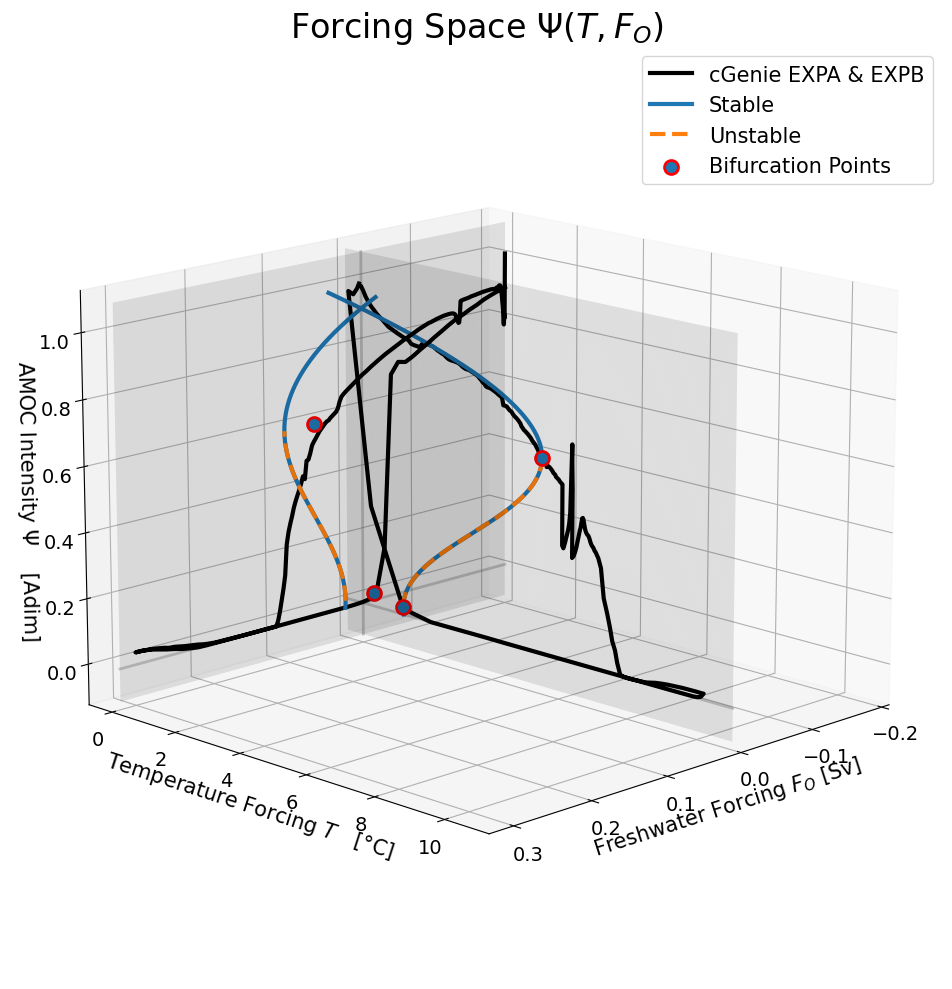

In [389]:
##### Generate data for the 3D plot #####
N = 1000
axis_F_O = np.linspace(-0.2,0.32,N)
axis_T = np.linspace(-0.5,11,N)
axis_Psi = np.linspace(-0.1,1.1,N)

bif_extension = False 
psi_range = np.linspace(0,0.95,N)
T_calib_module = (psi_range**3-a_AMOC*psi_range**2-b_AMOC*psi_range-c_AMOC-e_AMOC*F_GIS_cst_A-f_AMOC*F_O_cst_A)/d_AMOC
if bif_extension:
    M = 100
    bif_ext = np.zeros(M)
    T_calib_module = np.concatenate((T_calib_module, bif_ext))
    psi_ext = np.zeros(M)
    psi_range = np.concatenate((psi_range, psi_ext))
    print(T_calib_module)
    print(len(T_calib_module))
F_O_calib_module = (psi_range**3-a_AMOC*psi_range**2-b_AMOC*psi_range-c_AMOC-d_AMOC*T_forcing_cst_C-e_AMOC*F_GIS_cst_C)/f_AMOC
unstable_psi = np.linspace(cGenie_crit_params[1],cGenie_crit_params[0],N)
FO_unstable = FO_funct_psi(unstable_psi)

##### Create a 3D plot #####
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('auto', adjustable='box')

### Plot of the axis straight lines ###
ax.plot3D(axis_F_O,np.zeros(N),np.zeros(N),lw=2,color='gray',alpha=0.4)
ax.plot3D(np.zeros(N),axis_T,np.zeros(N),lw=2,color='gray',alpha=0.4)
ax.plot3D(np.zeros(N),np.zeros(N),axis_Psi,lw=2,color='gray',alpha=0.4)

### Plot of 2d plans ###
## T plan ## 
plan_y = axis_T
plan_z = axis_Psi
plan_y, plan_z = np.meshgrid(plan_y,plan_z)
plan_x = np.zeros_like(plan_y)
ax.plot_surface(plan_x, plan_y, plan_z, color='black', alpha=0.1)
## F_O plan ## 
plan_x = axis_F_O
plan_z = axis_Psi
plan_x, plan_z = np.meshgrid(plan_x,plan_z)
plan_y = np.zeros_like(plan_x)
ax.plot_surface(plan_x, plan_y, plan_z, color='black', alpha=0.1)

### Plot of Temp Forcing Bifurcation Diagram (x=0) ###
ax.plot(xs=np.zeros(len(norm_atl_max_overt_ExpA)),ys=global_sat_anomaly_cGenie,zs=norm_atl_max_overt_ExpA,zdir='z',color='black',label='cGenie EXPA & EXPB',lw=3)
ax.plot(xs=np.zeros(len(T_calib_module)),ys=T_calib_module,zs=psi_range,color='tab:blue',label='Stable',lw=3)
ax.plot(xs=np.zeros(len(T_unstable)),ys=T_unstable,zs=unstable_psi,linestyle='dashed',color='tab:orange',label='Unstable',lw=3)

### Plot of F_O Forcing Bifurcation Diagram (y=0) ###
ax.plot(xs=hosing_forcing_it,ys=np.zeros(len(hosing_forcing_it)),zs=norm_atl_max_overt_ExpB,zdir='z',color='black',lw=3)
ax.plot(xs=F_O_calib_module,ys=np.zeros(len(F_O_calib_module)),zs=psi_range,color='tab:blue',lw=3)
ax.plot(xs=FO_unstable,ys=np.zeros(len(FO_unstable)),zs=unstable_psi,linestyle='dashed',color='tab:orange',lw=3)

### Plot of the bifurcations points ###
plot_bifu_points = True
if plot_bifu_points:
    ax.scatter(xs=0,ys=Tp,zs=Psip,marker='o', color="#1f77b4",linewidths=2,s=100, edgecolors="red", label='Bifurcation Points')
    ax.scatter(xs=0,ys=Tm,zs=Psim,marker='o', color="#1f77b4",linewidths=2,s=100, edgecolors="red")
    ax.scatter(xs=FOp,ys=0,zs=Psip,marker='o', color="#1f77b4",linewidths=2,s=100, edgecolors="red")
    ax.scatter(xs=FOm,ys=0,zs=Psim,marker='o', color="#1f77b4",linewidths=2,s=100, edgecolors="red")
#### Cosmetics ####
## Add labels and title for the 3D plot ##
ax.set_xlabel('Freshwater Forcing '+r'$F_{O}$ [Sv]',fontsize=15)
ax.set_ylabel('Temperature Forcing '+r'$ T\quad$[°C]',fontsize=15)
ax.set_zlabel('AMOC Intensity '+r'$\Psi\quad$ [Adim]',fontsize=15)
ax.set_xlim(axis_F_O[0],axis_F_O[-1])
ax.set_ylim(axis_T[0],axis_T[-1])
ax.set_zlim(axis_Psi[0],axis_Psi[-1])
ax.set_title('Forcing Space '+r'$\Psi(T,F_{O})$',size=24)

#### Show the plot ####
plt.tick_params(axis='both',labelsize=14)
ax.legend(fontsize=15)
plt.tight_layout()
#ax.view_init(elev=10,azim=0) # view v1
#ax.view_init(elev=10,azim=20) # view v2
ax.view_init(elev=15,azim=45) # view v3
ax.dist = 10.5
plt.savefig(save_fig_dir+'Forcing_Space_T&FO_v2_wth_bif',dpi=400)
#plt.savefig(save_fig_dir+'Forcing_Space_T&FGIS_v2_wth_bif_pts_ext',dpi=600)
plt.show()

---
## Other Things
### Phase Portrait - AMOC

Phase portrait of the $\frac{d\Psi}{dt} = f(\Psi)$ function, Eq.(1) and computation of the equilibrium points

In [390]:
### Computation of the equilibirum points of equation (1) ###

eq_points_1 = fsolve(dPsi_dt, -0.5, args=(TAMOC_B, FGIS_A, FO_A, AMOC_crit_params))
eq_points_2 = fsolve(dPsi_dt, 0.5, args=(TAMOC_B, FGIS_A, FO_A, AMOC_crit_params))
eq_points_3 = fsolve(dPsi_dt, 1.25, args=(TAMOC_B, FGIS_A, FO_A, AMOC_crit_params))

eq_points = [eq_points_1, eq_points_2, eq_points_3]

### Plot of the phase portrait Eq.(1) with equilibrium points ###
N = 1000
Psi = np.linspace(-0.1, 1.1, N)
Y = np.zeros(N)
for i in range(N):
    y = dPsi_dt(Psi[i], T_forcing=TAMOC_B, FGIS_forcing=FGIS_A, FO_forcing=FO_A, model_parameters=AMOC_crit_params)
    Y[i] = y
    
fig, ax = plt.subplots(1,1,figsize=(15,7))

ax.plot(Psi, Y, label = r"$h(\Psi, T, F_{GIS}, F_O)$", lw=2)
plt.axhline(y=0, color="black", label="$\dot{\Psi}=0$")
for i in range(3):
    plt.plot(eq_points[i], dPsi_dt(eq_points[i], T_forcing=TAMOC_B, FGIS_forcing=FGIS_A, FO_forcing=FO_A, model_parameters=AMOC_crit_params), "ko")
ax.set_xlabel(r"$\Psi$", fontsize = 16)
ax.set_ylabel(r"$\dot{\Psi}$", fontsize = 16)
ax.set_title("Phase portrait of "+r"$\frac{d\Psi}{dt} = h(\Psi, T, F_{GIS}, F_{O})$" + " with " + r"$T={}°C,$".format(TAMOC_B) + r" $F_{GIS}$" + r"$={}\,Sv,$".format(FGIS_A) + r" $F_{O}$" + r"$={}\,Sv$".format(FO_A), fontsize = 16)
ax.legend(fontsize = 12)
plt.grid()
plt.plot()

[]

### Phase Portrait - GIS

Phase portrait of the $\frac{dV}{dt} = g(V)$ function, Eq.(4) and computation of the equilibrium points

In [391]:
### Computation of the equilibirum points of equation (1) ###

eq_points_1 = fsolve(dV_dt, 0.2, args=(TGIS_D, Psi_C, GIS_crit_params))
eq_points_2 = fsolve(dV_dt, 0.5, args=(TGIS_D, Psi_C, GIS_crit_params))
eq_points_3 = fsolve(dV_dt, 1.25, args=(TGIS_D, Psi_C, GIS_crit_params))

eq_points = [eq_points_1, eq_points_2, eq_points_3]

### Plot of the phase portrait Eq.(1) with equilibrium points ###
N = 1000
V = np.linspace(-0.1, 1.1, N)
Y = np.zeros(N)
#Z = np.zeros(N)
for i in range(N):
    y = dV_dt(V[i], TGIS_D, Psi_C, GIS_crit_params)
    Y[i] = y

fig, ax = plt.subplots(1,1,figsize=(15,7))

ax.plot(V, Y, label = r"$g(V, T_V, \Psi_V)$", lw=2)
plt.axhline(y=0, color="black", label="$\dot{V}=0$")
for i in range(3):
    plt.plot(eq_points[i], dV_dt(eq_points[i], TGIS_D, Psi_C, GIS_crit_params), "ko")
ax.set_xlabel(r"$V$", fontsize = 16)
ax.set_ylabel(r"$\dot{V}$", fontsize = 16)
ax.set_title("Phase portrait of "+r"$\frac{dV}{dt} = g(V, T_V, \Psi_V)$"+" with "+r"$T_V$={}°C,".format(TGIS_D)+r" $\Psi={}$".format(Psi_C), fontsize = 16)
ax.legend(fontsize = 12)
plt.grid()
plt.plot()

[]

### Bifurcation Diagram

#### AMOC - Bifurcation Diagram

In order to find the bifurcation diagram we will try two differents methods cfr [[Note de Travail - Cadre Algorithmique Coefficients de Couplage]].

The **first method** is to isolate the expression of the forcing consider with respect to the value of the dynamic variable $\Psi$ at equilibrium noted $\psi$. 

For the **sensitivity experiment A** this relation is equal to
$$ T = (\psi^3-a_1\psi^2-b_1\psi-c_1-e_{12}F_{GIS}^A-fF_O^A)\frac{1}{d_1} = T(\psi)\quad (8) $$ 

The idea is to plot this relation and then invert it in order to have the $(T,\psi(T))$ graph which is our bifurcation diagram.

For the **sensitivity experiment B** this relation is equal to

$$ F_{GIS} = (\psi^3-a_1\psi^2-b_1\psi-c_1-d_1T^B-fF_O^B)\frac{1}{e_{12}} = F_{GIS}(\psi) \quad (9) $$ 

For the **sensitivity experiment C** this relation is equal to

$$ F_O = (\psi^3-a_1\psi^2-b_1\psi-c_1-d_1T^C-e_{12}F_{GIS}^C)\frac{1}{f} = F_O(\psi) \quad (10) $$ 

The **second method** is to define a more general algorithm for finding explicitly the roots of Eq.(1) by iterating the fsolve() function of scipy with different initial conditions in order to get all the roots since we can have up to three roots, three equilibria for the same value of the forcing. This should not be hard to do but since the first method is easier to implement and gives good results I will not take the research further for the moment for the second method.



In [392]:
# Definition of the function folowing Eq.(8-10) # 
def T_funct_psi(psi):
  return ((psi**3 - a_AMOC*(psi**2) - b_AMOC*psi - c_AMOC - e_AMOC*FGIS_A- f_AMOC*FO_A)*(1/d_AMOC))

def FGIS_funct_psi(psi):
  return ((psi**3 - a_AMOC*(psi**2) - b_AMOC*psi - c_AMOC - d_AMOC*TAMOC_B - f_AMOC*FO_B)*(1/e_AMOC))

def FO_funct_psi(psi):
  return ((psi**3 - a_AMOC*(psi**2) - b_AMOC*psi - c_AMOC - d_AMOC*TAMOC_C - e_AMOC*FGIS_C)*(1/f_AMOC))

# Computation of the functions # 
dx=0.01
psi_range = np.arange(-0.2,1.2,dx)
T_fct_psi = T_funct_psi(psi_range)
FGIS_fct_psi = FGIS_funct_psi(psi_range)
FO_fct_psi = FO_funct_psi(psi_range)

# Classification of the unstable branche # 

unstable_psi = np.arange(AMOC_crit_params[1], AMOC_crit_params[0], dx)
T_fct_psi_unstable = T_funct_psi(unstable_psi)
FGIS_fct_psi_unstable = FGIS_funct_psi(unstable_psi)
FO_fct_psi_unstable = FO_funct_psi(unstable_psi)

Plot of the $(\delta T, \Psi(\delta T))$ graph - Bifurcation diagram of $\delta T$

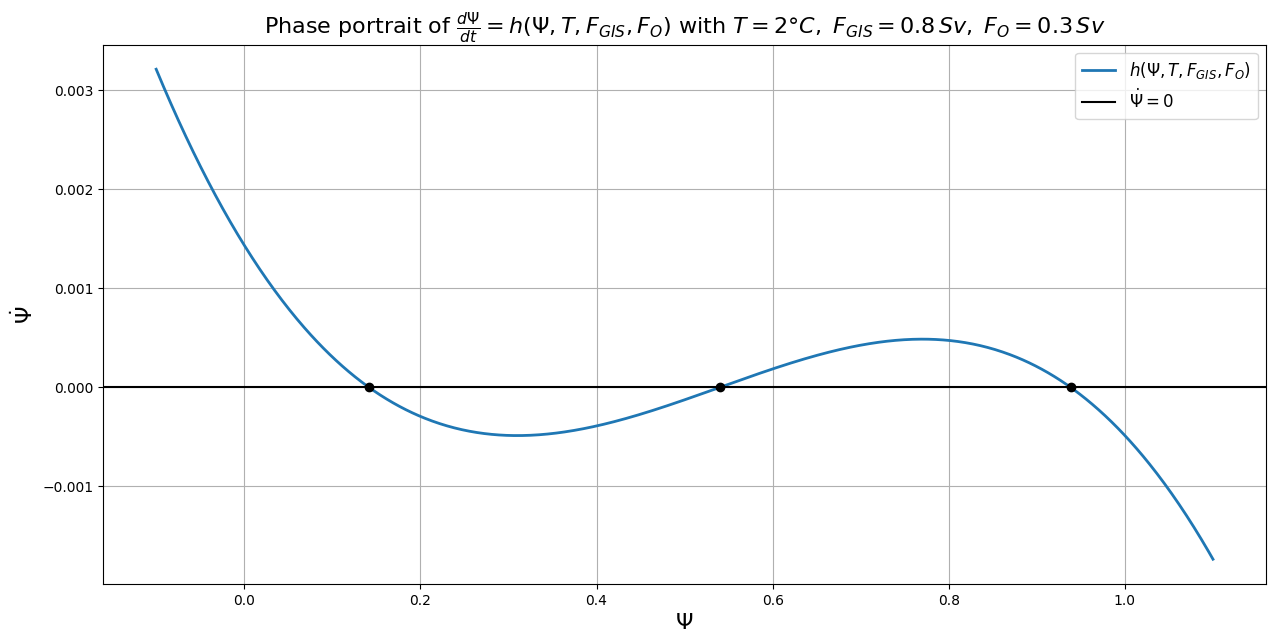

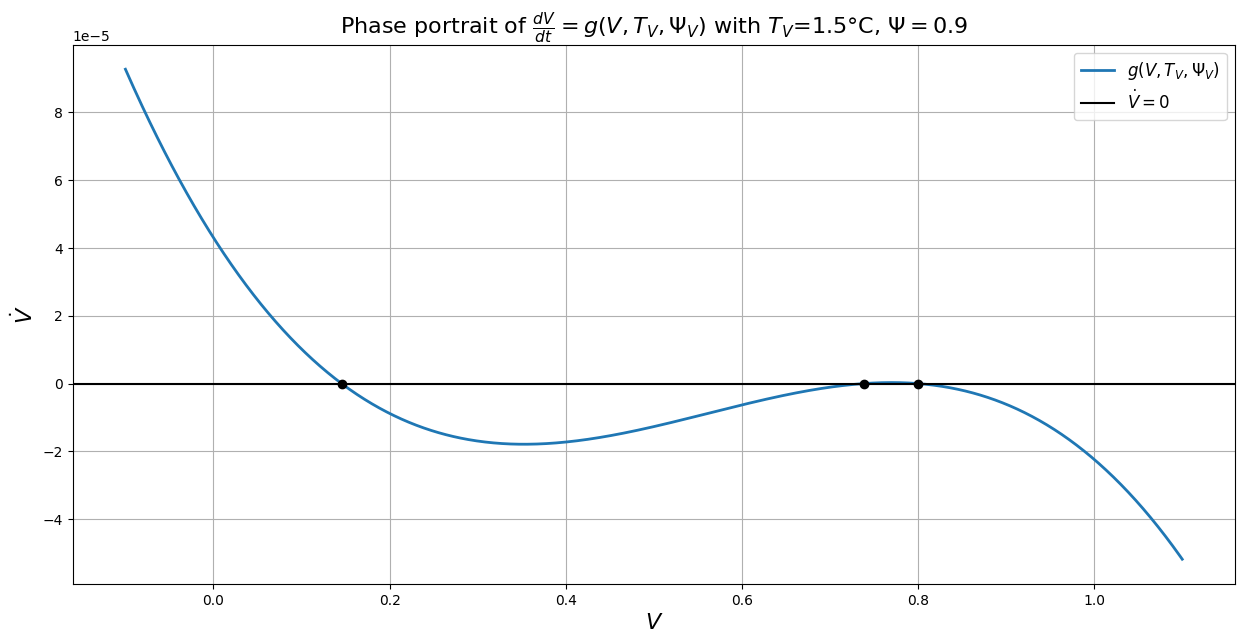

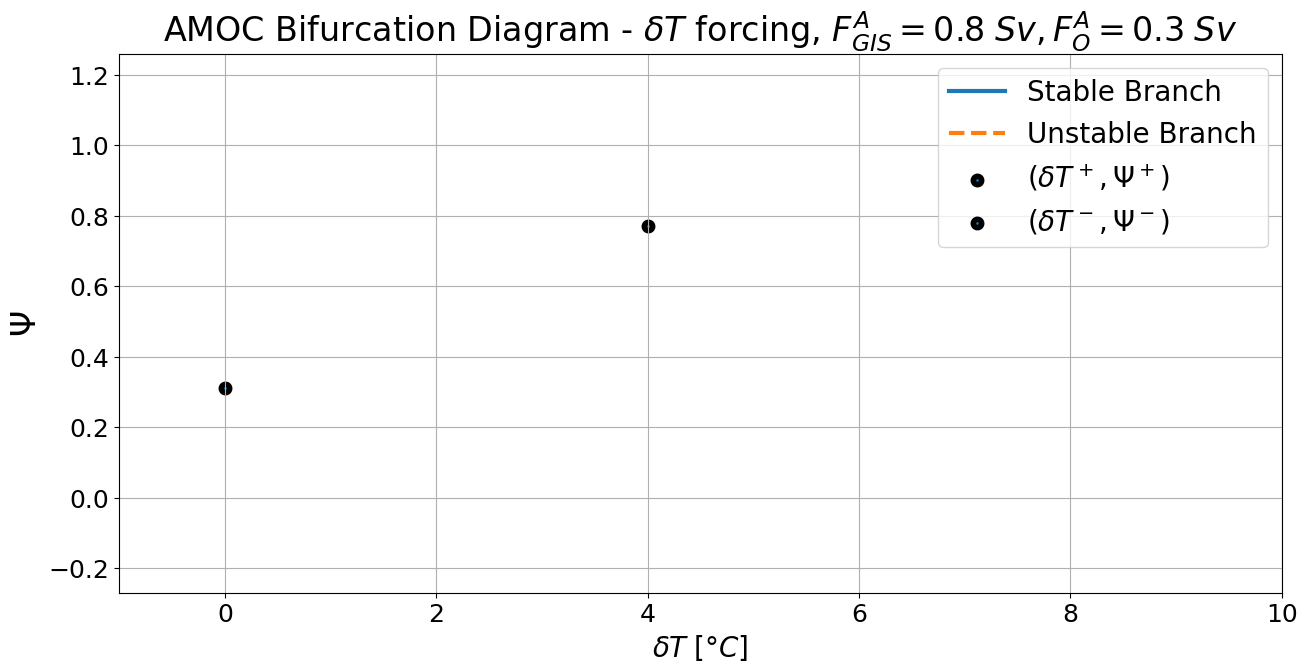

In [393]:
### Plotting ###

fig, ax = plt.subplots(1,1,figsize=(15,7))

## Plot of the bifurcation diagram ##
plt.plot(T_fct_psi, psi_range, label="Stable Branch", lw=3)
plt.plot(T_fct_psi_unstable, unstable_psi, color="tab:orange", label="Unstable Branch", lw=3, linestyle="dashed")

## Plot of the critical points ##
plt.scatter(AMOC_crit_params[2],AMOC_crit_params[0], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\delta T^+, \Psi^+)$")
plt.scatter(AMOC_crit_params[3],AMOC_crit_params[1], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\delta T^-, \Psi^-)$")

## Plot cosmetics ##
ax.set_xlabel(r"$\delta T\;[°C]$", fontsize=20)
ax.set_ylabel(r"$\Psi$", fontsize=24)
ax.set_xbound([-1,10])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r"AMOC Bifurcation Diagram - $\delta T$ forcing, $F_{GIS}^A$" + r"$= {} \;Sv, $".format(FGIS_A) + r"$F_O^A = {} \; Sv$".format(FO_A), fontsize = 24)
plt.legend(fontsize=20)
plt.grid()

plt.show()

fig.savefig(r"/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures/Bifurcation Diagram/AMOC_T_BD_FGISA={}_FOA={}.png".format(FGIS_A, FO_A))

Plot of the $(F_{GIS}, \psi(F_{GIS}))$ graph - Bifurcation diagram of $F_{GIS}$

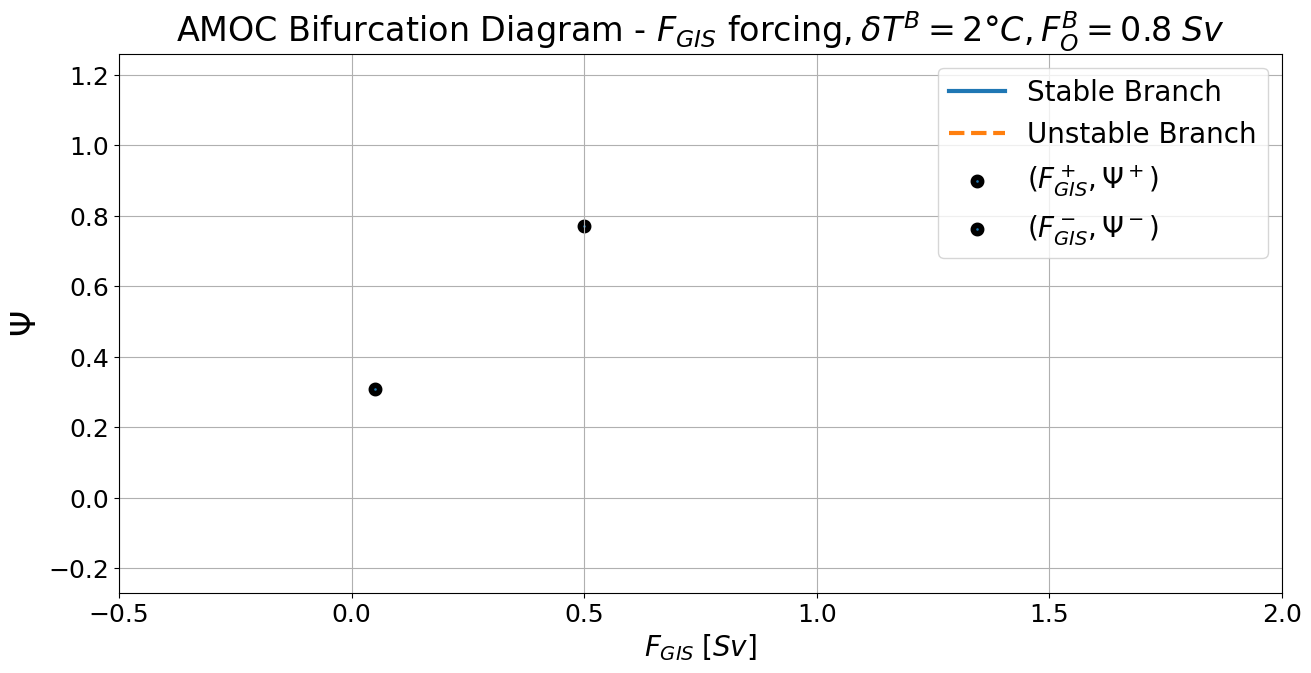

In [394]:
### Plotting ###

fig, ax = plt.subplots(1,1,figsize=(15,7))

## Plot of the bifurcation diagram ##
plt.plot(FGIS_fct_psi, psi_range, label="Stable Branch", lw=3)
plt.plot(FGIS_fct_psi_unstable, unstable_psi, color="tab:orange", label="Unstable Branch", lw=3, linestyle="dashed")

## Plot of the critical points ##
plt.scatter(AMOC_crit_params[4],AMOC_crit_params[0], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(F_{GIS}^+, \Psi^+)$")
plt.scatter(AMOC_crit_params[5],AMOC_crit_params[1], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(F_{GIS}^-, \Psi^-)$")

## Plot cosmetics ##
ax.set_xlabel(r"$F_{GIS}\;[Sv]$", fontsize=20)
ax.set_ylabel(r"$\Psi$", fontsize=24)
ax.set_xbound([-0.5,2])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r"AMOC Bifurcation Diagram - $F_{GIS}$ forcing,"+r"$ \:\delta T^B = {}°C, $".format(TAMOC_B) + r"$F_{O}^B =$" + r"${}\; Sv$".format(FO_B), fontsize = 24)
plt.legend(fontsize=20)
plt.grid()

plt.show()

fig.savefig(r"/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures/Bifurcation Diagram/AMOC_FGIS_BD_TB={}_FOB={}.png".format(TAMOC_B, FO_B))


Plot of the $(F_{O}, \psi(F_{O}))$ graph - Bifurcation diagram of $F_{O}$

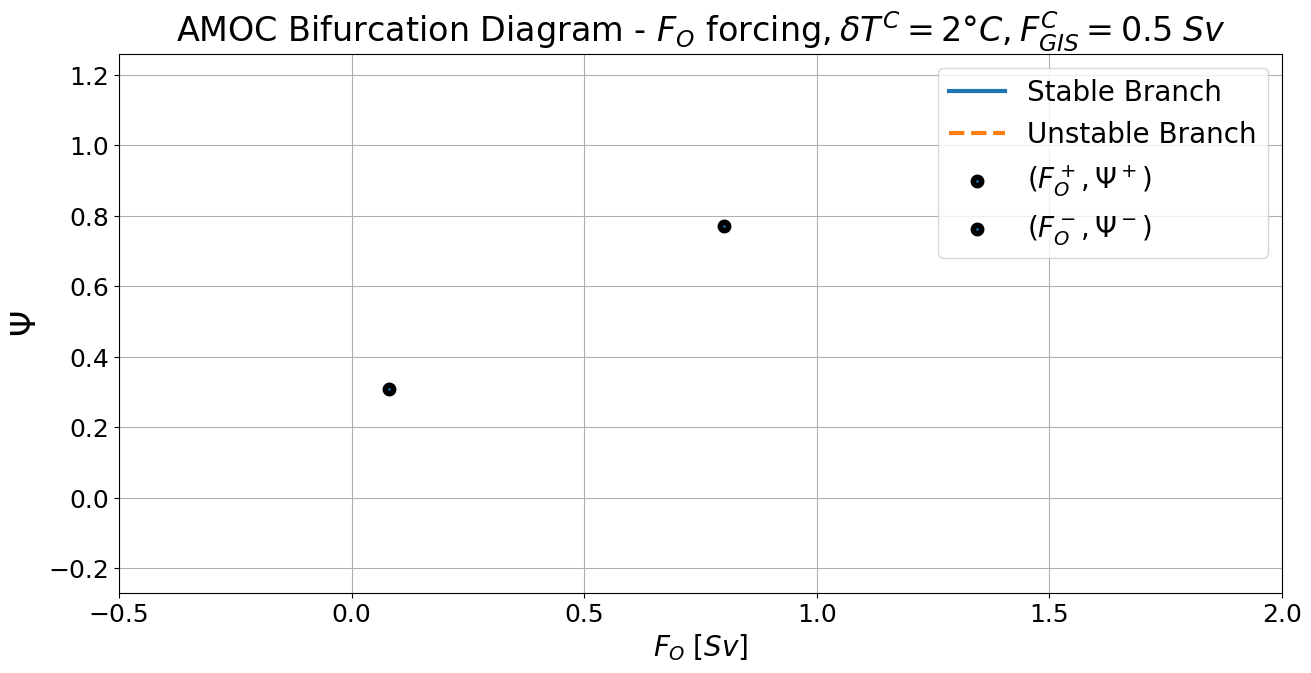

In [395]:
### Plotting ###

fig, ax = plt.subplots(1,1,figsize=(15,7))

## Plot of the bifurcation diagram ##
plt.plot(FO_fct_psi, psi_range, label="Stable Branch", lw=3)
plt.plot(FO_fct_psi_unstable, unstable_psi, color="tab:orange", label="Unstable Branch", lw=3, linestyle="dashed")

## Plot of the critical points ##
plt.scatter(AMOC_crit_params[6],AMOC_crit_params[0], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(F_{O}^+, \Psi^+)$")
plt.scatter(AMOC_crit_params[7],AMOC_crit_params[1], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(F_{O}^-, \Psi^-)$")

## Plot cosmetics ##
ax.set_xlabel(r"$F_{O}\;[Sv]$", fontsize=20)
ax.set_ylabel(r"$\Psi$", fontsize=24)
ax.set_xbound([-0.5,2])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r"AMOC Bifurcation Diagram - $F_{O}$ forcing,"+r"$ \:\delta T^C = {}°C, $".format(TAMOC_C) + r"$F_{GIS}^C =$" + r"${}\; Sv$".format(FGIS_C), fontsize = 24)
plt.legend(fontsize=20)
plt.grid()

plt.show()

fig.savefig(r"/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures/Bifurcation Diagram/AMOC_FO_BD_TC={}_FGISC={}.png".format(TAMOC_C, FGIS_C))


#### GIS - Bifurcation Diagram

Following the **first method** for finding the roots described above we wish to isolate the expression of the forcing parameter with respect to the value of the dynamic variable $V$ at equilibrium noted $v$. For the sensitivity experiment C this relation is equal to

$$ T_V = (v^3-a_2v^2-b_2v-c_2-e_{21}(1-\Psi^C))\frac{1}{d_2} = T_V(v)\quad (9)  $$ 

Again we will plot this relation and then invert it to have the $(T_V,v(T_V))$ graph which is our bifurcation diagram.

In [396]:
# Definition of the function folowing Eq.(9) and Eq.(10) # 
def Tv_funct_v(v):
    return ((v**3 - a_GIS*(v**2) - b_GIS*v - c_GIS - e_GIS*(1-Psi_C))*(1/d_GIS))
def Psi_funct_v(v):
    return (1 - (v**3 - a_GIS*(v**2) - b_GIS*v - c_GIS - d_GIS*TGIS_D)*(1/e_GIS))

# Computation of the functions # 
dx=0.01
v_range = np.arange(0,1.2,dx)
Tv_fct_v = Tv_funct_v(v_range)
Psi_fct_v = Psi_funct_v(v_range)

# Classification of the unstable branche # 

unstable_v = np.arange(GIS_crit_params[1], GIS_crit_params[0], dx)
Tv_fct_v_unstable = Tv_funct_v(unstable_v)
Psi_fct_v_unstable = Psi_funct_v(unstable_v)

Plot of the $(v, T_V(v))$ graph - Bifurcation diagram of $\delta T_V$

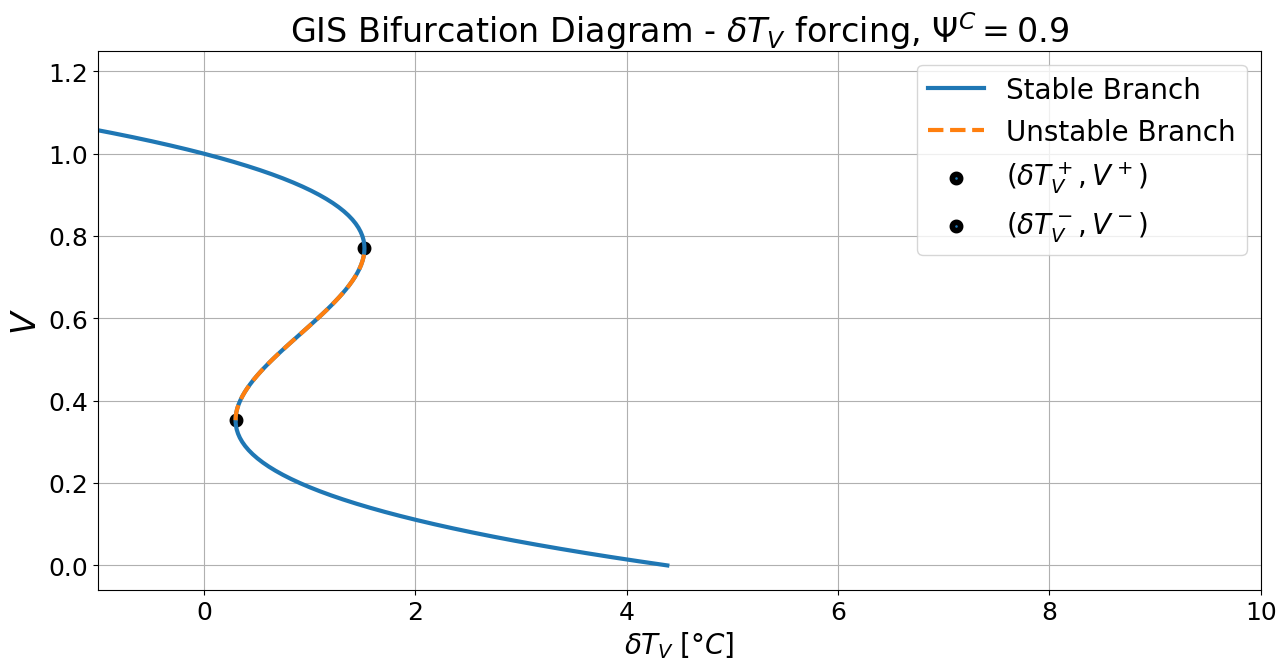

In [397]:
### Plotting ###

fig, ax = plt.subplots(1,1,figsize=(15,7))

## Plot of the bifurcation diagram ##
plt.plot(Tv_fct_v, v_range, label="Stable Branch", lw=3)
plt.plot(Tv_fct_v_unstable, unstable_v, color="tab:orange", label="Unstable Branch", lw=3, linestyle="dashed")

## Plot of the critical points ##
plt.scatter(GIS_crit_params[2],GIS_crit_params[0], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\delta T_V^+, V^+)$")
plt.scatter(GIS_crit_params[3],GIS_crit_params[1], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\delta T_V^-, V^-)$")

## Plot cosmetics ##
ax.set_xlabel(r"$\delta T_V\;[°C]$", fontsize=20)
ax.set_ylabel(r"$V$", fontsize=24)
ax.set_xbound([-1,10])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r"GIS Bifurcation Diagram - $\delta T_V$ forcing, $\Psi^C = {} $".format(Psi_C), fontsize = 24)
plt.legend(fontsize=20)
plt.grid()

plt.show()

fig.savefig(r"/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures/Bifurcation Diagram/GIS_T_BD_PsiC={}.png".format(Psi_C))

Plot of the $(\Psi_V, V(\Psi_V))$ graph - Bifurcation diagram of $\Psi_V$

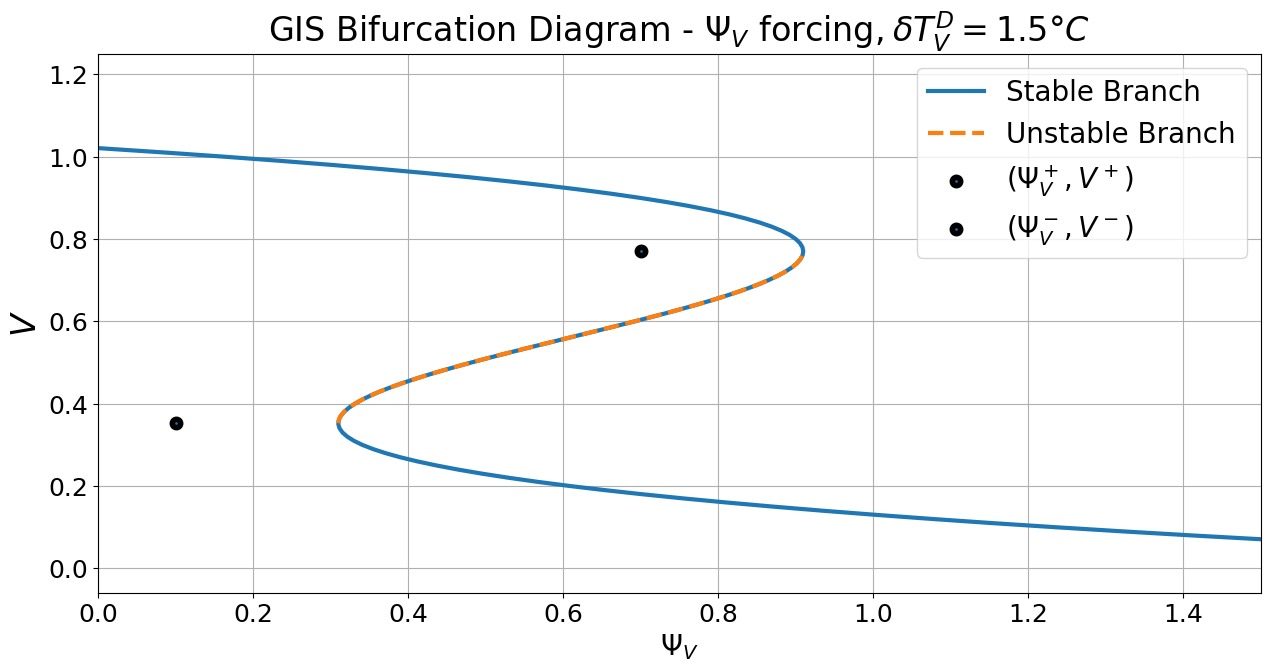

In [398]:
### Plotting ###

fig, ax = plt.subplots(1,1,figsize=(15,7))

## Plot of the bifurcation diagram ##
plt.plot(Psi_fct_v, v_range, label="Stable Branch", lw=3)
plt.plot(Psi_fct_v_unstable, unstable_v, color="tab:orange", label="Unstable Branch", lw=3, linestyle="dashed")

## Plot of the critical points ##
plt.scatter(GIS_crit_params[4],GIS_crit_params[0], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\Psi_V^+, V^+)$")
plt.scatter(GIS_crit_params[5],GIS_crit_params[1], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\Psi_V^-, V^-)$")

## Plot cosmetics ##
ax.set_xlabel(r"$\Psi_V$", fontsize=20)
ax.set_ylabel(r"$V$", fontsize=24)
ax.set_xbound([0,1.5])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r"GIS Bifurcation Diagram - $\Psi_V$ forcing,"+r"$ \:\delta T_V^D = {}°C$".format(TGIS_D), fontsize = 24)
plt.legend(fontsize=20)
plt.grid()

plt.show()

fig.savefig(r"/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures/Bifurcation Diagram/GIS_Psi_BD_TD={}.png".format(TGIS_D))